<a href="https://colab.research.google.com/github/FatihKarabas/AI-WORKS/blob/main/Band%C4%B1rma_AirQualityIndex_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **VERİ SETİ**

Bandırma Air Quality Dataset (2021–2024)
Bu veri seti, Türkiye'nin Balıkesir ili Bandırma ilçesinde 2021-2024 yılları arasında ölçülen saatlik hava kirletici ve meteoroloji verilerine aittir.

35.064 (saatlik) gözlem ve 11 sütundan oluşmaktadır.

Zaman Boyutu: year, month, day, hour sütunlarıyla belirtilmiş (Henüz datetime tipine çevrilmemiş)

Kirletici Değişkenler (µg/m³):

pm10: Partikül Madde (10 mikron)

so2: Kükürt Dioksit

no2: Azot Dioksit

o3 : Ozon (Troposferik)

Meteorolojik Değişkenler:

temp : Sıcaklık

dwpt : Çiy Noktası

rhum : Bağıl Nem

prcp : Yağış

wdir : Rüzgar Yönü

wspd : Rüzgar Hızı

pres : Basınç


Kaynak:

T.C. Çevre Şehircilik ve İklim Değişikliği Bakanlığı, resmi internet sitesi url :
https://sim.csb.gov.tr/

https://dev.meteostat.net/python/hourly.html#example

https://meteostat.net/


Bandırma Air Quality Dataset (2021–2024)

Bu veri seti, Türkiye'nin Balıkesir ili Bandırma ilçesinde 2021-2024 yılları arasında ölçülen saatlik hava kirletici ve meteoroloji verilerine aittir.

35.064 (saatlik) gözlem ve 11 sütundan oluşmaktadır.

Sütunlar

datetime: Ölçüm zaman

**pm10** (Partikül Madde 10 mikron), **so2** (Kükürt Dioksit), **no2** (Azot Dioksit), **o3** (Ozon – Troposferik): Kirletici konsantrasyonları (µg/m³)

temp (sıcaklık), dwpt (çiy noktası), rhum (bağıl nem), prcp (yağış), wdir (rüzgar yönü), wspd (rüzgar hızı), pres (basınç): Meteoroloji verileri

Kaynak:

T.C. Çevre Şehircilik ve İklim Değişikliği Bakanlığı, resmi internet sitesi url :
https://sim.csb.gov.tr/

https://dev.meteostat.net/python/hourly.html#example

https://meteostat.net/


In [ ]:
!pip install meteostat

# Import Meteostat library and dependencies
from datetime import datetime
from meteostat import Hourly

# Set time period
start = datetime(2021, 1, 1)
end = datetime(2025, 1, 1, 1, 0)

# Get hourly data
datam = Hourly('17115', start, end)  # 17115 Station Identifiers BANDIRMA TANIMLAYICI KODU
datam = datam.fetch()

# Print DataFrame
print(datam)
datam = Hourly('17115', start, end)  # 17115 Station Identifiers BANDIRMA TANIMLAYICI KODU
datam = datam.fetch()

# Print DataFrame
print(datam)

                     temp  dwpt   rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                            
2021-01-01 00:00:00  11.9   9.5   85.0   NaN   NaN  180.0  18.4   NaN  1014.5   
2021-01-01 01:00:00  11.0   9.1   88.0   NaN   NaN  260.0  14.8   NaN  1014.0   
2021-01-01 02:00:00  11.0  10.1   94.0   NaN   NaN  150.0   7.6   NaN  1014.0   
2021-01-01 03:00:00  10.1   9.2   94.0   NaN   NaN  170.0   9.4   NaN  1014.6   
2021-01-01 04:00:00  11.0  10.1   94.0   NaN   NaN  220.0   7.6   NaN  1015.0   
...                   ...   ...    ...   ...   ...    ...   ...   ...     ...   
2024-12-31 21:00:00   2.1   1.7   97.0   0.0   NaN    0.0   0.0   NaN  1033.4   
2024-12-31 22:00:00   1.0   1.0  100.0   0.0   NaN  100.0   1.8   NaN  1032.0   
2024-12-31 23:00:00   1.0   1.0  100.0   0.0   NaN  260.0   1.8   NaN  1033.0   
2025-01-01 00:00:00   0.5   0.1   97.0   0.0   NaN  230.0   1.8   NaN  1033.4   
2025-01-01 01:00:00   1.0   

#Keşifsel Veri Analizi (Exploratory Data Analysis)

##Veri Yükleme ve İnceleme

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [126]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Bandirma_AQ.xlsx"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fkarabas/bandirma-aqi-2021-2024",
  file_path,)


In [ ]:
df.head()  # Varsayılan olarak ilk 5 satırı gösterir

,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2021,1,1,0,20.08,6.94,10.22,55.56,11.9,9.5,85,0.0,180.0,18.4,1014.5
1,2021,1,1,1,18.07,8.22,12.64,51.94,11.0,9.1,88,NaN,260.0,14.8,1014.0
2,2021,1,1,2,26.32,5.63,7.98,66.38,11.0,10.1,94,NaN,150.0,7.6,1014.0
3,2021,1,1,3,25.14,2.48,4.65,69.10,10.1,9.2,94,NaN,170.0,9.4,1014.6
4,2021,1,1,4,24.23,2.08,3.49,67.40,11.0,10.1,94,NaN,220.0,7.6,1015.0


In [127]:
df.shape  # (satır sayısı, sütun sayısı)

(35064, 15)

In [128]:
df.sample(6)  # Rastgele belirlenen sayıda satırı gösterir

,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
14632,2022,9,2,16,48.89,10.53,39.22,47.21,27.0,20.1,66,0.0,20.0,7.6,1009.0
30806,2024,7,7,14,27.89,1.40,14.69,85.50,30.0,17.1,46,0.0,20.0,33.5,1012.0
10807,2022,3,27,7,59.57,2.38,37.47,19.43,8.0,2.0,66,0.0,161.0,3.6,1029.0
22412,2023,7,23,20,47.42,3.89,31.42,NaN,28.0,20.0,62,0.0,50.0,22.3,1015.0
6531,2021,9,30,3,20.45,1.22,7.32,73.39,18.1,12.5,70,0.0,30.0,29.5,1020.7
28804,2024,4,15,4,42.74,2.09,23.85,19.85,7.0,5.9,93,0.0,250.0,3.6,1021.0


In [129]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   pm10    32366 non-null  float64
 5   so2     33940 non-null  float64
 6   no2     33945 non-null  float64
 7   o3      22884 non-null  float64
 8   temp    35064 non-null  float64
 9   dwpt    35064 non-null  float64
 10  rhum    35064 non-null  int64  
 11  prcp    34778 non-null  float64
 12  wdir    35035 non-null  float64
 13  wspd    35064 non-null  float64
 14  pres    34902 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 4.0 MB


10.satırda [rhum] sütun değerleriniveri tipi "int64" olarak gelmiş bunu "float64" olarak değiştiryorum.

In [130]:
df['rhum'] = df['rhum'].astype('float64')

In [131]:
df.dtypes

,0
year,int64
month,int64
day,int64
hour,int64
pm10,float64
so2,float64
no2,float64
o3,float64
temp,float64
dwpt,float64


In [132]:
df.nunique()

,0
year,4
month,12
day,31
hour,24
pm10,8934
so2,3184
no2,7854
o3,9691
temp,404
dwpt,345


In [133]:
# Tüm sütunların gösterilmesi ve ekran genişliğinin arttırılması
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # DataFrame'in çok satıra bölünmesini engeller
pd.set_option('display.width', None)           # Genişliği sınırlama

# Define the lists of pollutant and meteorological variables
kirleticiler = ['pm10', 'so2', 'no2', 'o3']
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
selected_cols = kirleticiler + meteorolojik

df_selected = df[selected_cols]

print(df_selected.describe().T)

        count         mean         std     min      25%      50%      75%      max
pm10  32366.0    43.264454   25.314861    0.31    26.27    37.62    53.81   320.89
so2   33940.0     8.258972    7.441090    0.00     3.83     6.23    10.46   209.86
no2   33945.0    31.745957   20.415370    0.38    16.96    27.27    41.70   178.03
o3    22884.0    54.206199   30.292367    1.28    31.28    53.39    75.26   192.34
temp  35064.0    15.521986    8.121103   -8.30     9.20    15.00    22.00    43.00
dwpt  35064.0    10.790038    6.541019   -9.50     6.20    11.00    16.00    27.00
rhum  35064.0    75.925650   16.789278   13.00    64.00    78.00    89.00   100.00
prcp  34778.0     0.073679    0.383725    0.00     0.00     0.00     0.00    11.70
wdir  35035.0   118.630427  115.663545    0.00    30.00    51.00   200.00   360.00
wspd  35064.0    16.274809   11.481866    0.00     5.40    14.80    24.10    74.20
pres  34902.0  1015.906143    6.416063  980.00  1011.60  1015.00  1020.00  1038.20


| Değişken | Ortalama | Standart Sapma | Min–Maks    | Açıklama                                                                                                                                             |
| -------- | -------- | -------------- | ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| **pm10** | 43.26    | 25.31          | 0.31–320.89 | Ortalama seviyede ancak bazı ekstrem (yüksek) değerler mevcut. Sağlık sınırlarını aşabilecek günler olabilir.                                        |
| **so2**  | 8.26     | 7.44           | 0.00–209.86 | Genellikle düşük ama bazı zirve değerler (örneğin 209) ciddi kaynaklı emisyonlara işaret edebilir.                                                   |
| **no2**  | 31.75    | 20.42          | 0.38–178.03 | Ortalama düzeyde azot dioksit var, trafiğin yoğun olduğu saatler/süreçler araştırılabilir.                                                           |
| **o3**   | 54.21    | 30.29          | 1.28–192.34 | Ozon değerleri yüksek değişkenlik göstermektedir, mevsimsel etkilerle ilişkili olabilir. Ayrıca eksik veri oranı yüksektir (12.000'den fazla eksik). |


| Değişken         | Ortalama | Standart Sapma | Min–Maks     | Açıklama                                                                             |
| ---------------- | -------- | -------------- | ------------ | ------------------------------------------------------------------------------------ |
| **temp (°C)**    | 15.52    | 8.12           | -8.3–43.0    | Doğal bir dağılım, mevsim geçişlerine uygun.                                         |
| **dwpt (°C)**    | 10.79    | 6.54           | -9.5–27.0    | Çiy noktası sıcaklığı beklenen aralıklarda.                                          |
| **prcp (mm)**    | 0.07     | 0.38           | 0.0–11.7     | Çok sayıda sıfır değer (yağışsız saat), yağışın az ve seyrek olduğu görülüyor.       |
| **wdir (°)**     | 118.63   | 115.66         | 0–360        | Rüzgar yönü tam dairesel kapsamda (360°) ölçülmüş. Ortalama batı–güneybatı arası.    |
| **wspd (km/s?)** | 16.27    | 11.48          | 0.0–74.2     | Rüzgar hızı çok değişken, bazı ekstrem değerler fırtınalı koşulları işaret edebilir. |
| **pres (hPa)**   | 1015.91  | 6.42           | 980.0–1038.2 | Basınç normal atmosfer aralığında, ölçüm güvenilir gözüküyor.                        |


📌 Genel Değerlendirme

Eksik veri sorunu özellikle pm10, o3, ve prcp değişkenlerinde dikkat çekmektedir.

Aykırı değerler pm10, so2, no2, ve wspd gibi değişkenlerde yüksek sapma ve maks. değerlerde görülmektedir → İleride aykırı değer analizi yapılmalı.

Mevsimsel desen analizi yapılması uygun görünüyor çünkü sıcaklık, rüzgar, basınç gibi meteorolojik değişkenlerde yıllık varyasyonlar belirgin olabilir.

Ozon (O₃) seviyelerinin özellikle yaz dönemlerinde ve sıcaklıkla birlikte nasıl değiştiği incelenmeli çünkü sağlık etkileri oldukça belirgindir.

##Eksik Veri Analizi ve Temizleme

### Zaman serisi analizi için veri seti hazırla.

In [134]:
# year, month, day ve hour sütunlarını birleştirerek datetime değişkeni oluştur
df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])

# datetime değişkenini veri setinin en başına alalım
cols = ["datetime"] + [col for col in df.columns if col != "datetime"]
df = df[cols]

# datetime'e göre sıralayalım
df = df.sort_values("datetime").reset_index(drop=True)

# Yeni yapıyı göster
df.head()

,datetime,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2021-01-01 00:00:00,2021,1,1,0,20.08,6.94,10.22,55.56,11.9,9.5,85.0,0.0,180.0,18.4,1014.5
1,2021-01-01 01:00:00,2021,1,1,1,18.07,8.22,12.64,51.94,11.0,9.1,88.0,NaN,260.0,14.8,1014.0
2,2021-01-01 02:00:00,2021,1,1,2,26.32,5.63,7.98,66.38,11.0,10.1,94.0,NaN,150.0,7.6,1014.0
3,2021-01-01 03:00:00,2021,1,1,3,25.14,2.48,4.65,69.10,10.1,9.2,94.0,NaN,170.0,9.4,1014.6
4,2021-01-01 04:00:00,2021,1,1,4,24.23,2.08,3.49,67.40,11.0,10.1,94.0,NaN,220.0,7.6,1015.0


In [135]:
# Eksik veri sayısı ve oranı
eksik = df.isnull().sum()
oran = 100 * df.isnull().mean()

# Sadece eksik değeri olanları yazdır
print(pd.DataFrame({'Eksik veri Sayısı': eksik, 'Oran (%)': oran.map(lambda x: f'{x:.3f}')})[eksik > 0])

      Eksik veri Sayısı Oran (%)
pm10               2698    7.695
so2                1124    3.206
no2                1119    3.191
o3                12180   34.736
prcp                286    0.816
wdir                 29    0.083
pres                162    0.462


 Sonuçlara göre özellikle O₃ (ozon) değişkeninde ciddi eksiklik (%34,7), diğer değişkenlerde ise %1–8 arasında eksiklikler mevcut.

EKSİK VERİLERİN ZAMAN DESENİ

 Saatlik Eksik Veri Deseni

<Figure size 1200x600 with 0 Axes>

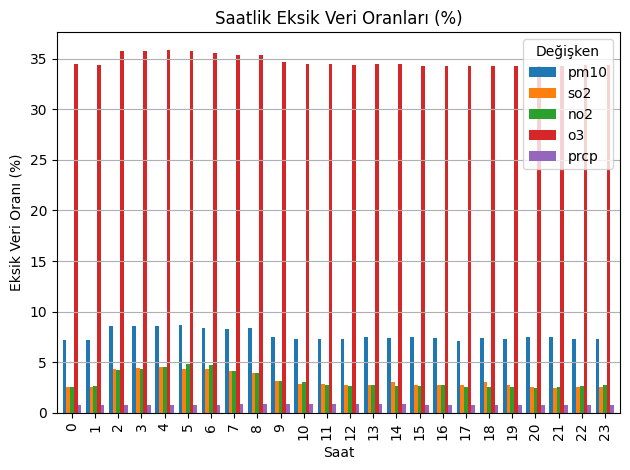

In [136]:
# Saatlik eksik veri oranlarını yeniden hesaplayalım
saatlik_eksik = df.groupby("hour")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Bar plot çizimi
plt.figure(figsize=(12, 6))
saatlik_eksik.plot(kind='bar', width=0.8)
plt.title("Saatlik Eksik Veri Oranları (%)")
plt.xlabel("Saat")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right')
plt.tight_layout()
plt.show()


🕒 Saatlik Eksik Veri Deseni  

Gece saatlerinde (00:00–05:00) pm10, so2, no2 gibi kirletici gazlarda eksik veri oranı belirgin şekilde artmaktadır.

🔹 Muhtemel neden: Otomatik ölçüm sistemlerinin devre dışı kalması veya bakım süreçleri.

o3 (ozon) değişkeni günün tüm saatlerinde %30 civarında eksik; bu da sistematik bir eksiklik olduğunu göstermektedir.

🔹 Muhtemel neden: Sensör arızası, veri kaybı ya da cihaz hassasiyet sorunları.

prcp (yağış) verisi tüm saatlerde istikrarlı ve güvenilir; eksiklik oranı düşüktür.

🟡 Bu desenler, eksik verilerin rastgele değil, belirli saat dilimlerinde yoğunlaştığını göstermekte; dolayısıyla zaman duyarlı tamamlama yöntemleri tercih edilmelidir.

📌 Genel Öneri:

pm10, so2, no2 için gece saatlerine özel eksik değer tamamlama yöntemleri (örneğin benzer günlerdeki aynı saatlerin ortalaması) uygulanabilir.

o3 için daha gelişmiş bir yöntem (ör. IterativeImputer + pozitif regresör) kaçınılmazdır.

**Günlük Eksik Veri Deseni**

<Figure size 1200x600 with 0 Axes>

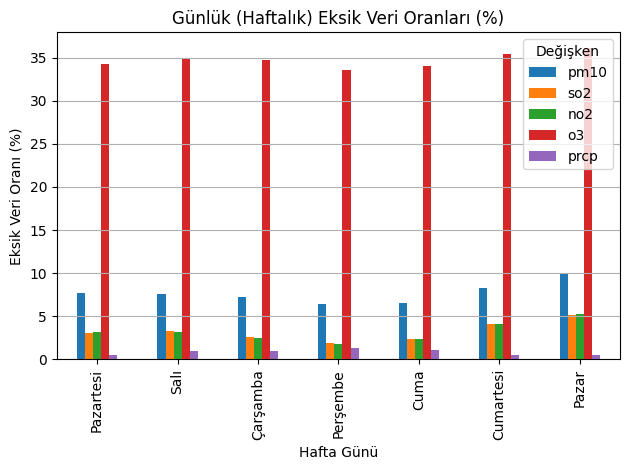

In [137]:
# Gün bilgisi ekleyelim
df["weekday"] = df["datetime"].dt.dayofweek  # Pazartesi = 0, Pazar = 6
hafta_gunleri = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
df["hafta_gunu"] = df["weekday"].apply(lambda x: hafta_gunleri[x])

# Günlük (haftalık) eksik veri oranlarını hesaplayalım
gunluk_eksik = df.groupby("hafta_gunu")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Günleri haftalık sıraya göre sıralayalım
gunluk_eksik = gunluk_eksik.reindex(hafta_gunleri)

# Bar plot ile görselleştirelim
plt.figure(figsize=(12, 6))
gunluk_eksik.plot(kind='bar')
plt.title("Günlük (Haftalık) Eksik Veri Oranları (%)")
plt.xlabel("Hafta Günü")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right')
plt.tight_layout()
plt.show()


🟢 Genel Gözlemler:
pm10, so2, no2 değişkenlerinde hafta sonu (Cumartesi–Pazar) eksiklik oranı belirgin şekilde artmaktadır.

o3 değişkeni ise hafta boyunca yüksek ve sabit eksiklik oranı (~%30) göstermektedir.

prcp değişkeni yine tüm günlerde düşük eksik oranı ile dikkat çekmektedir.

📌 Özet:
Eksik veriler rastgele dağılmamakta, hafta sonlarında artış göstermektedir. Bu da veri eksikliği yönetiminde zaman-temelli stratejilerin (örn. hafta içi ve sonu ayrı ele alma) önemini ortaya koymaktadır.

**Aylık Eksik Veri Deseni**

<Figure size 1200x600 with 0 Axes>

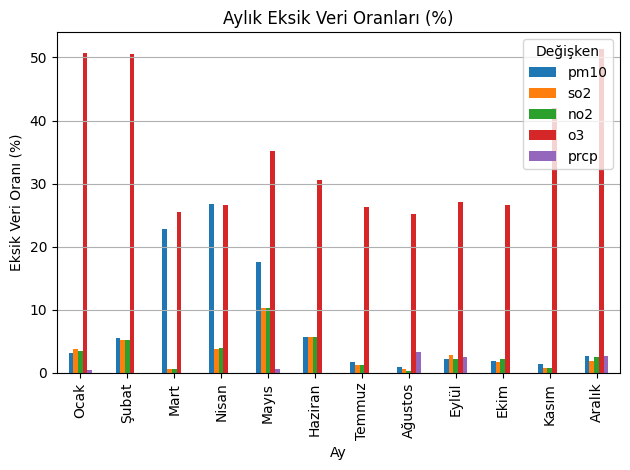

In [138]:
# Aylık eksik veri oranlarını yeniden hesaplayalım
aylik_eksik = df.groupby("month")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Ay isimleri listesi
ay_isimleri = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
aylik_eksik.index = ay_isimleri

# Bar plot çizimi
plt.figure(figsize=(12, 6))
aylik_eksik.plot(kind='bar')
plt.title("Aylık Eksik Veri Oranları (%)")
plt.xlabel("Ay")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right')
plt.tight_layout()
plt.show()

📅 Aylık Eksik Veri Deseni

o3 (Ozon):
En yüksek eksiklik kış ve sonbahar aylarında (Ocak, Şubat, Kasım, Aralık) görülmektedir (%40’un üzerinde).

🔹 Olası neden: Soğuk hava, düşük güneş ışınımı veya sensör performans sorunları.

pm10, so2, no2:
Eksiklik oranı kış aylarında (Ocak, Şubat, Aralık) artış göstermektedir.

🔹 Olası neden: Cihaz donmaları, bakım eksiklikleri, çevresel koşullar.

prcp (Yağış):
Tüm aylarda eksiklik oranı düşüktür ve verisi güvenilirdir.


📌 Ana Mesaj:

Eksik veriler mevsimsel olarak değişkenlik göstermektedir. Kış aylarında eksiklikler belirginleşmektedir. Bu nedenle, veri tamamlama stratejileri mevsime duyarlı şekilde planlanmalıdır.

**Mevsimlik Eksik Veri Deseni**

<Figure size 1000x600 with 0 Axes>

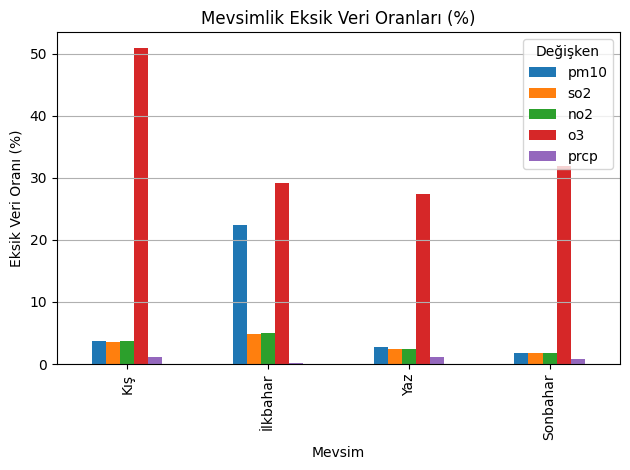

In [139]:
# Mevsim tanımlama fonksiyonunu tekrar oluşturalım
def ay_to_mevsim(ay):
    if ay in [12, 1, 2]:
        return "Kış"
    elif ay in [3, 4, 5]:
        return "İlkbahar"
    elif ay in [6, 7, 8]:
        return "Yaz"
    else:
        return "Sonbahar"

# 'mevsim' sütununu yeniden oluştur
df["mevsim"] = df["datetime"].dt.month.apply(ay_to_mevsim)

# Mevsimlik eksik veri oranlarını hesapla
mevsim_eksik = df.groupby("mevsim")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Mevsimleri sıralayalım
mevsim_sirasi = ["Kış", "İlkbahar", "Yaz", "Sonbahar"]
mevsim_eksik = mevsim_eksik.reindex(mevsim_sirasi)

# Bar plot çizimi
plt.figure(figsize=(10, 6))
mevsim_eksik.plot(kind='bar')
plt.title("Mevsimlik Eksik Veri Oranları (%)")
plt.xlabel("Mevsim")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right')
plt.tight_layout()
plt.show()


📌 Genel Değerlendirme:

Kış ve sonbahar aylarında eksik veri oranları tüm kirletici gazlar için yükselmektedir. Bu durum mevsimsel etkilerin sensör performansı üzerinde belirleyici olduğunu ve mevsime özel veri tamamlama yöntemlerinin zorunlu hale geldiğini açıkça göstermektedir.

🔁 IterativeImputer (Çoklu İtalyatif İmputasyon / MICE)

MICE (Multiple Imputation by Chained Equations), eksik verileri istatistiksel modelleme yoluyla dolduran bir yöntemdir. scikit-learn kütüphanesindeki IterativeImputer sınıfı bu yöntemin bir uygulamasıdır.

🧠 Nasıl Çalışır?

Her bir eksik sütun için regresyon modeli oluşturur.

Diğer sütunları bağımsız değişken (X), eksik sütunu bağımlı değişken (y) olarak kullanır.

Eksik değerleri tahmin eder ve yerine koyar.

Bu işlem tüm eksik sütunlar için sırasıyla tekrarlanır.

Birkaç iterasyon boyunca bu süreç döner ve değerler iyileştirilir.

✅ Avantajları

Mevsimsel veya çok değişkenli yapıları dikkate alır.

Tek boyutlu doldurmalardan (ortalama, medyan gibi) daha isabetlidir.

Özellikle eksiklik karmaşık desenler izliyorsa çok etkilidir.

❗ Dikkat Edilmesi Gerekenler

Tahmin modelleri (default: BayesianRidge) varsayımsal olabilir, modeller dikkatle seçilmeli.

Zaman serisi doğasında veri kaçağını (data leakage) önlemek için ileri-geri veri erişimi iyi yönetilmelidir.

Yüksek boyutlu veri için hesaplama maliyeti yüksektir.



In [140]:
# Gerekli kütüphaneler
!pip install xgboost  # Google Colab için
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBRegressor

# Kirletici ve meteorolojik değişkenler
kirleticiler = ['pm10', 'so2', 'no2', 'o3']
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
input_cols = kirleticiler + meteorolojik

# Veri çerçevesi (örnek olarak: df)
impute_df = df[input_cols].copy()

# XGBoost tabanlı imputasyon
imputer = IterativeImputer(
    estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    max_iter=10,
    random_state=42
)

# Eksik verileri tahmin et
imputed_array = imputer.fit_transform(impute_df)

# DataFrame'e aktar ve negatif değerleri düzelt
imputed_df = pd.DataFrame(imputed_array, columns=input_cols)
for col in kirleticiler:
    imputed_df[col] = imputed_df[col].apply(lambda x: max(x, 0))

# Orijinal veri setine aktar
for col in kirleticiler:
    df[col] = imputed_df[col]


In [141]:
# 🔹 1. Gerekli kütüphaneler
!pip install xgboost
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 🔹 2. Meteorolojik sütunları belirle
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'pres']  # 'wdir' hariç
df_meteo = df[meteorolojik].copy()

# 🔹 3. Imputer'ı tanımla
imputer = IterativeImputer(
    estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    max_iter=10,
    random_state=42
)

# 🔹 4. Eksik verileri tahmin et
imputed_array = imputer.fit_transform(df_meteo)
df[meteorolojik] = pd.DataFrame(imputed_array, columns=meteorolojik)

# 🔹 5. Negatif değer kontrolü (örneğin sıcaklıklar için)
for col in meteorolojik:
    df[col] = df[col].apply(lambda x: max(x, 0))


In [142]:
import numpy as np

# wdir eksik değerleri işlemek için sin-cos dönüşümü kullanalım

# Radyan dönüşümü
df['wdir_rad'] = np.deg2rad(df['wdir'])

# sin ve cos bileşenlerini oluştur
df['wdir_sin'] = np.sin(df['wdir_rad'])
df['wdir_cos'] = np.cos(df['wdir_rad'])

# Eksik sin ve cos değerlerini zaman tabanlı interpolasyonla tamamlayalım
df = df.set_index('datetime')
df['wdir_sin'] = df['wdir_sin'].interpolate(method='time')
df['wdir_cos'] = df['wdir_cos'].interpolate(method='time')

# sin ve cos bileşenlerinden orijinal dereceye geri dönüş
df['wdir'] = (np.arctan2(df['wdir_sin'], df['wdir_cos']) * 180 / np.pi) % 360

# Geçici sütunları kaldıralım
df = df.drop(columns=['wdir_rad', 'wdir_sin', 'wdir_cos'])

# Eksik veri kalmış mı kontrol edelim
df['wdir'].isnull().sum()


np.int64(0)

In [143]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2021-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        35064 non-null  int64  
 1   month       35064 non-null  int64  
 2   day         35064 non-null  int64  
 3   hour        35064 non-null  int64  
 4   pm10        35064 non-null  float64
 5   so2         35064 non-null  float64
 6   no2         35064 non-null  float64
 7   o3          35064 non-null  float64
 8   temp        35064 non-null  float64
 9   dwpt        35064 non-null  float64
 10  rhum        35064 non-null  float64
 11  prcp        35064 non-null  float64
 12  wdir        35064 non-null  float64
 13  wspd        35064 non-null  float64
 14  pres        35064 non-null  float64
 15  weekday     35064 non-null  int32  
 16  hafta_gunu  35064 non-null  object 
 17  mevsim      35064 non-null  object 
dtypes: float64(11), int32(1), int64

In [144]:
print(df_selected.describe().T)

        count         mean         std     min      25%      50%      75%      max
pm10  32366.0    43.264454   25.314861    0.31    26.27    37.62    53.81   320.89
so2   33940.0     8.258972    7.441090    0.00     3.83     6.23    10.46   209.86
no2   33945.0    31.745957   20.415370    0.38    16.96    27.27    41.70   178.03
o3    22884.0    54.206199   30.292367    1.28    31.28    53.39    75.26   192.34
temp  35064.0    15.521986    8.121103   -8.30     9.20    15.00    22.00    43.00
dwpt  35064.0    10.790038    6.541019   -9.50     6.20    11.00    16.00    27.00
rhum  35064.0    75.925650   16.789278   13.00    64.00    78.00    89.00   100.00
prcp  34778.0     0.073679    0.383725    0.00     0.00     0.00     0.00    11.70
wdir  35035.0   118.630427  115.663545    0.00    30.00    51.00   200.00   360.00
wspd  35064.0    16.274809   11.481866    0.00     5.40    14.80    24.10    74.20
pres  34902.0  1015.906143    6.416063  980.00  1011.60  1015.00  1020.00  1038.20


Fonksyonlar
 isnull(), fillna() fonksiyonlar1 eksik
verileri tespit etme ve doldurma için
kullan1l1r

Yapay zeka önerileri ile eksik veri
stratejileri geli_tirilir. Daha do ru ve
güvenilir veri setleri olu_turulur.

 Eksik veri analizi, veri kalitesini
art1rmak için kritik öneme sahiptir.
Do ru analizler için temel olu_turur.


## Aykırı Değerler (Outliers)

In [145]:
from scipy.stats import zscore
import pandas as pd
from IPython.display import display # Import display

# Sayısal değişkenler üzerinde Z-score hesaplayalım
numeric_cols = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
z_scores = df[numeric_cols].apply(zscore)

# Aykırı değerler: Z-score mutlak değeri > 3
z_outlier_counts = (z_scores.abs() > 3).sum()
total_counts = df[numeric_cols].count()
z_outlier_ratios = (z_outlier_counts / total_counts * 100).round(2)

# Özet tablo
z_outlier_summary = pd.DataFrame({
    'Aykırı Değer Sayısı (Z > 3)': z_outlier_counts,
    'Toplam Gözlem': total_counts,
    'Aykırı Oranı (%)': z_outlier_ratios
}).sort_values(by='Aykırı Oranı (%)', ascending=False)

# Use the standard display function instead of ace_tools
print("Z-Score Aykırı Değer Özeti:")
display(z_outlier_summary)

Z-Score Aykırı Değer Özeti:


,Aykırı Değer Sayısı (Z > 3),Toplam Gözlem,Aykırı Oranı (%)
prcp,532,35064,1.52
so2,521,35064,1.49
pm10,522,35064,1.49
no2,451,35064,1.29
o3,172,35064,0.49
wspd,116,35064,0.33
pres,116,35064,0.33
rhum,62,35064,0.18
temp,5,35064,0.01
dwpt,0,35064,0.00


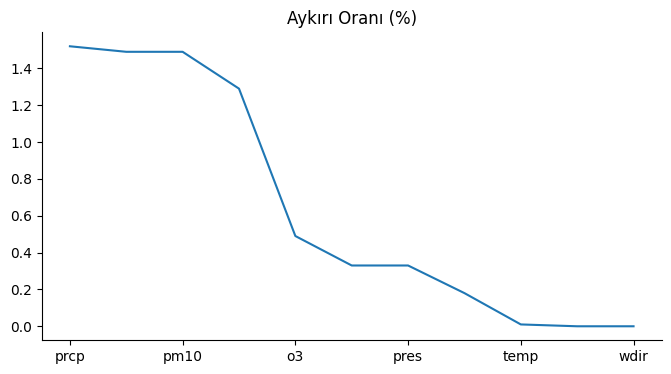

In [146]:
from matplotlib import pyplot as plt
z_outlier_summary['Aykırı Oranı (%)'].plot(kind='line', figsize=(8, 4), title='Aykırı Oranı (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

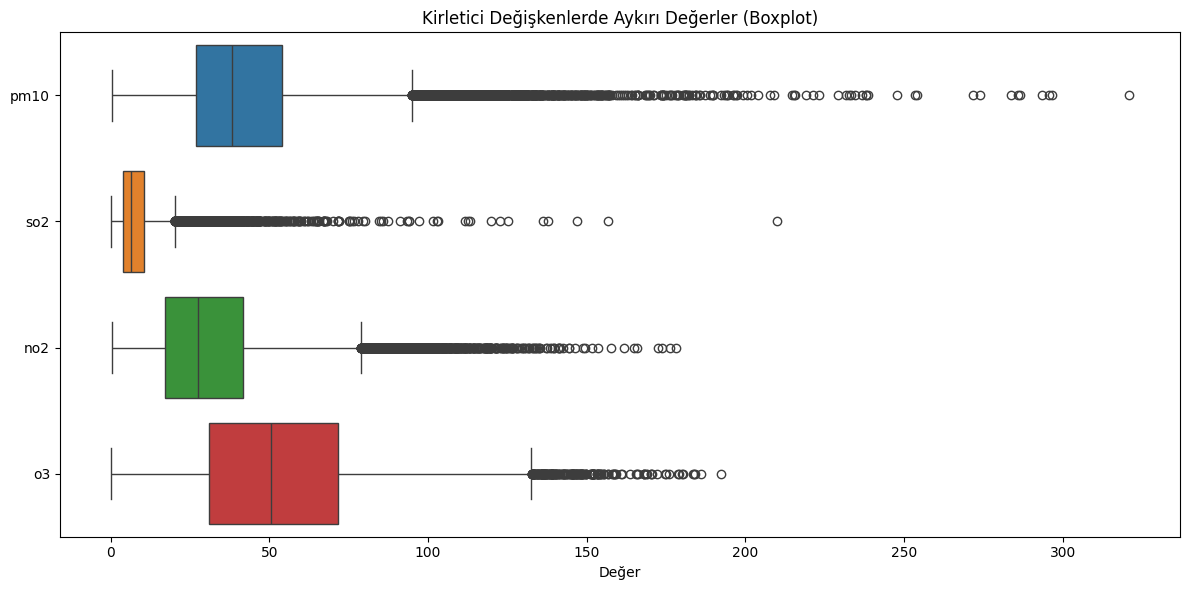

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kirletici değişkenler
kirleticiler = ['pm10', 'so2', 'no2', 'o3']

# Grafik ayarları
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[kirleticiler], orient='h')
plt.title("Kirletici Değişkenlerde Aykırı Değerler (Boxplot)")
plt.xlabel("Değer")
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['year', 'month', 'day', 'hour', 'pm10', 'so2', 'no2', 'o3', 'temp',
       'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'weekday', 'hafta_gunu',
       'mevsim'],
      dtype='object')

Tüm Değişkenlerde IQR Yöntemiyle Aykırı Değerlerin Mevsimsel Dağılımı

<Figure size 1400x800 with 0 Axes>

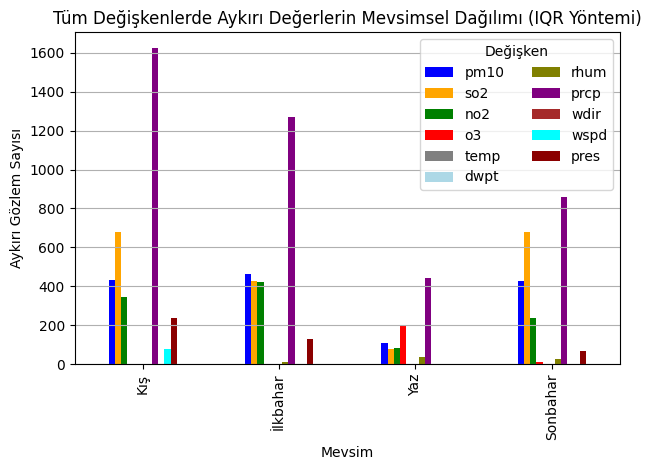

,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
mevsim,,,,,,,,,,,
Kış,430,681,346,0,0,0,0,1624,0,76,235
İlkbahar,464,426,424,1,0,0,10,1272,0,3,127
Yaz,109,79,85,197,3,0,35,440,0,2,0
Sonbahar,429,680,237,9,0,0,27,861,0,1,66


In [148]:
# Gerekli kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt

df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])

# Mevsim belirleme fonksiyonu
def ay_to_mevsim(ay):
    if ay in [12, 1, 2]:
        return "Kış"
    elif ay in [3, 4, 5]:
        return "İlkbahar"
    elif ay in [6, 7, 8]:
        return "Yaz"
    else:
        return "Sonbahar"

# Mevsim sütununu ekle
df["mevsim"] = df["datetime"].dt.month.apply(ay_to_mevsim)

# İncelenecek tüm sayısal değişkenler (kirleticiler + meteorolojik)
tum_deg = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']

# IQR yöntemiyle aykırı değer tespiti ve etiketleme
for col in tum_deg:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col + '_aykiri'] = ((df[col] < lower) | (df[col] > upper)).astype(int)

# Mevsime göre aykırı değerlerin toplamını hesapla
aykiri_mevsim = df.groupby('mevsim')[[col + '_aykiri' for col in tum_deg]].sum()

# Kolon adlarını sadeleştir
aykiri_mevsim.columns = tum_deg

# Mevsimleri sıralı hale getir
mevsim_sirasi = ["Kış", "İlkbahar", "Yaz", "Sonbahar"]
aykiri_mevsim = aykiri_mevsim.reindex(mevsim_sirasi)

# Görselleştirme
plt.figure(figsize=(14, 8))
renkler = ['blue', 'orange', 'green', 'red', 'gray', 'lightblue', 'olive', 'purple', 'brown', 'cyan', 'darkred']
aykiri_mevsim.plot(kind='bar', color=renkler)
plt.title("Tüm Değişkenlerde Aykırı Değerlerin Mevsimsel Dağılımı (IQR Yöntemi)")
plt.xlabel("Mevsim")
plt.ylabel("Aykırı Gözlem Sayısı")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

# Çıktıyı da tablo halinde verelim
aykiri_mevsim


📌 Açıklamalar:

🟦 Kirletici Değişkenler (pm10, so2, no2, o3)

Kış ve Sonbahar aylarında pm10, so2, no2 aykırılıkları oldukça yüksek → Isınma kaynaklı emisyonlar etkili.

Yaz ayında o3 aykırı değerleri dikkat çekici → Güneş ışınımı + sıcaklık nedeniyle ozon üretimi.

🔵 Meteorolojik Değişkenler

prcp (yağış) mevsimsel aykırılıkta en belirgin değişkendir: Kış ve ilkbaharda çok yüksek.

pres (basınç) yine kış ve ilkbahar aylarında anormal varyasyonlar göstermekte.

wspd (rüzgar hızı) ve rhum (bağıl nem) değişkenlerinde de mevsimsel sapmalar mevcut.

🔴 Açısal veri olan wdir için IQR yöntemi anlamlı bir sonuç üretmedi (sıfır aykırı gözlem) → bu beklenen bir durumdur.


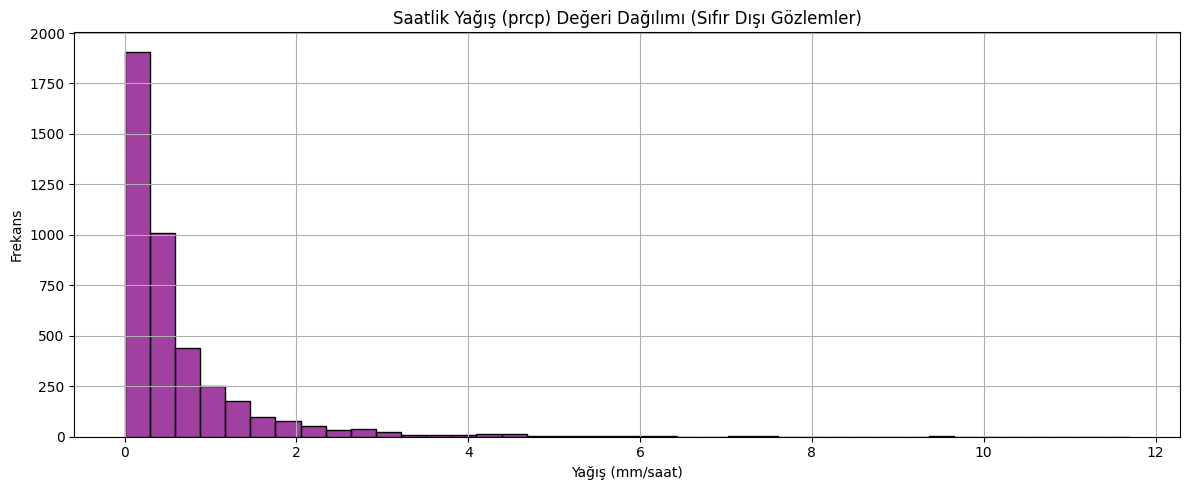

In [149]:
# 0 olmayan saatlik yağış verisini filtrele
df_prcp = df[df['prcp'] > 0].copy()

#  Histogram (yağış dağılımı - genel)
plt.figure(figsize=(12, 5))
sns.histplot(df_prcp["prcp"], bins=40, kde=False, color="purple")
plt.title("Saatlik Yağış (prcp) Değeri Dağılımı (Sıfır Dışı Gözlemler)")
plt.xlabel("Yağış (mm/saat)")
plt.ylabel("Frekans")
plt.grid(True)
plt.tight_layout()
plt.show()

prcp Değişkeni Nedir?

prcp (precipitation), meteorolojik veri setlerinde yağış miktarını ifade eder.
Veri türü genellikle milimetre (mm) cinsindendir ve saatlik gözlemler için şu şekilde anlamlandırılır:

| `prcp` Değeri (mm/saat) | Anlamı                                         |
| ----------------------- | ---------------------------------------------- |
| `0.0`                   | Yağış yok (kuru saat)                          |
| `0.1 – 0.5`             | Çok hafif yağmur                               |
| `0.6 – 2.5`             | Hafif yağmur                                   |
| `2.6 – 7.6`             | Orta şiddette yağmur                           |
| `>7.6`                  | Şiddetli yağmur, sağanak                       |
| `>10`                   | Muhtemelen kısa süreli fırtına / yoğun sağanak |


📈 Histogram (Yağış Dağılımı – Sıfır Dışı Değerler)

Çoğu saatlik yağış değeri 0–2 mm aralığında yoğunlaşmıştır. Daha yüksek yağışlar (5 mm, 10 mm ve üstü) nadirdir ama mevcuttur. Bu dağılım, pozitif sağa çarpık (right-skewed) yapıdadır.

Saatlik yağışlar genellikle kısa süreli ve düşük yoğunlukludur. Nadir ancak aşırı yağışlar (örneğin >10 mm) ekstrem hava olaylarına karşılık gelir.

log1p(prcp) Dönüşümü

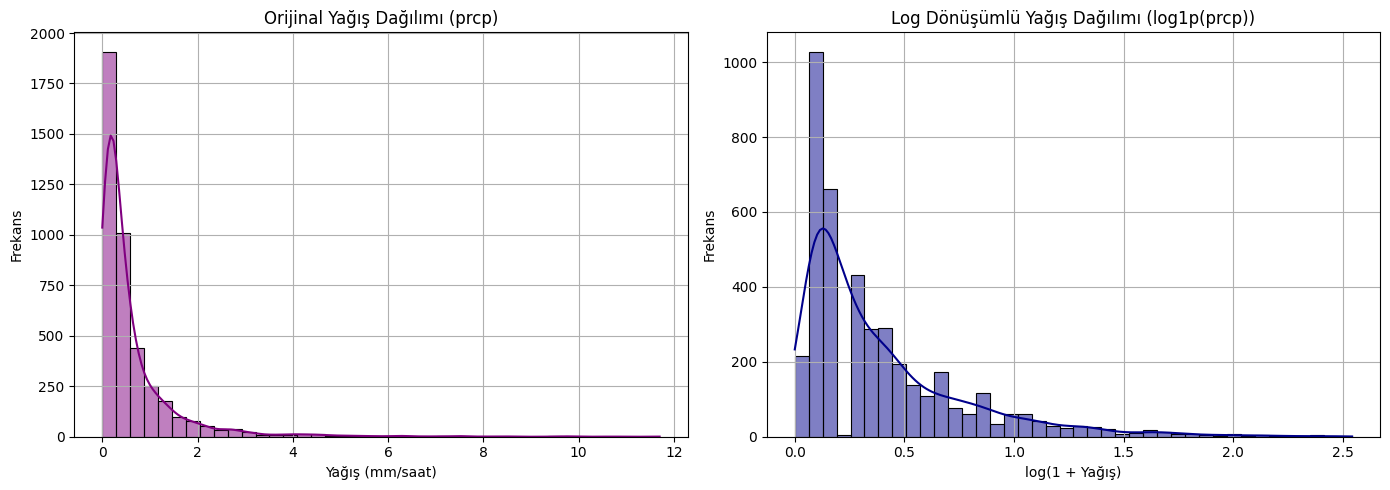

In [150]:
# Sıfır dışı prcp verisini filtrele ve log dönüşümünü uygula
df_prcp_raw = df[df['prcp'] > 0].copy()
df_prcp_raw['prcp_log'] = np.log1p(df_prcp_raw['prcp'])

# Histogramları çiz
plt.figure(figsize=(14, 5))

# 1. Orijinal prcp histogramı
plt.subplot(1, 2, 1)
sns.histplot(df_prcp_raw["prcp"], bins=40, kde=True, color='purple')
plt.title("Orijinal Yağış Dağılımı (prcp)")
plt.xlabel("Yağış (mm/saat)")
plt.ylabel("Frekans")
plt.grid(True)

# 2. Log dönüşümlü prcp histogramı
plt.subplot(1, 2, 2)
sns.histplot(df_prcp_raw["prcp_log"], bins=40, kde=True, color='darkblue')
plt.title("Log Dönüşümlü Yağış Dağılımı (log1p(prcp))")
plt.xlabel("log(1 + Yağış)")
plt.ylabel("Frekans")
plt.grid(True)

plt.tight_layout()
plt.show()

| Kriter          | Orijinal `prcp` | `log1p(prcp)` Dönüşümü                          |
| --------------- | --------------- | ----------------------------------------------- |
| Aykırı Etki     | Çok yüksek      | Azalmış                                         |
| Simetriklik     | Bozuk           | Artmış                                          |
| Model Uygunluğu | Düşük           | Yüksek                                          |
| Yorumu          | mm/saat         | log dönüşümlü birim – yorumu dikkatli yapılmalı |


✅ Tavsiye:
Modelleme aşamasında log1p(prcp) kullanın.

Tahmin sonrası yeniden ölçeklendirme için np.expm1() kullanarak orijinal değeri geri alabilirsiniz.

Görselleştirme ve raporlama aşamalarında ise orijinal prcp değerini kullanmaya devam edin.

İstersen bu dönüşümlü veri ile modellemeye geçebilir veya diğer meteorolojik/kirletici değişkenlerde benzer dönüşümleri uygulayabiliriz. Hangisini istersin?










## Veri Görselleştirme

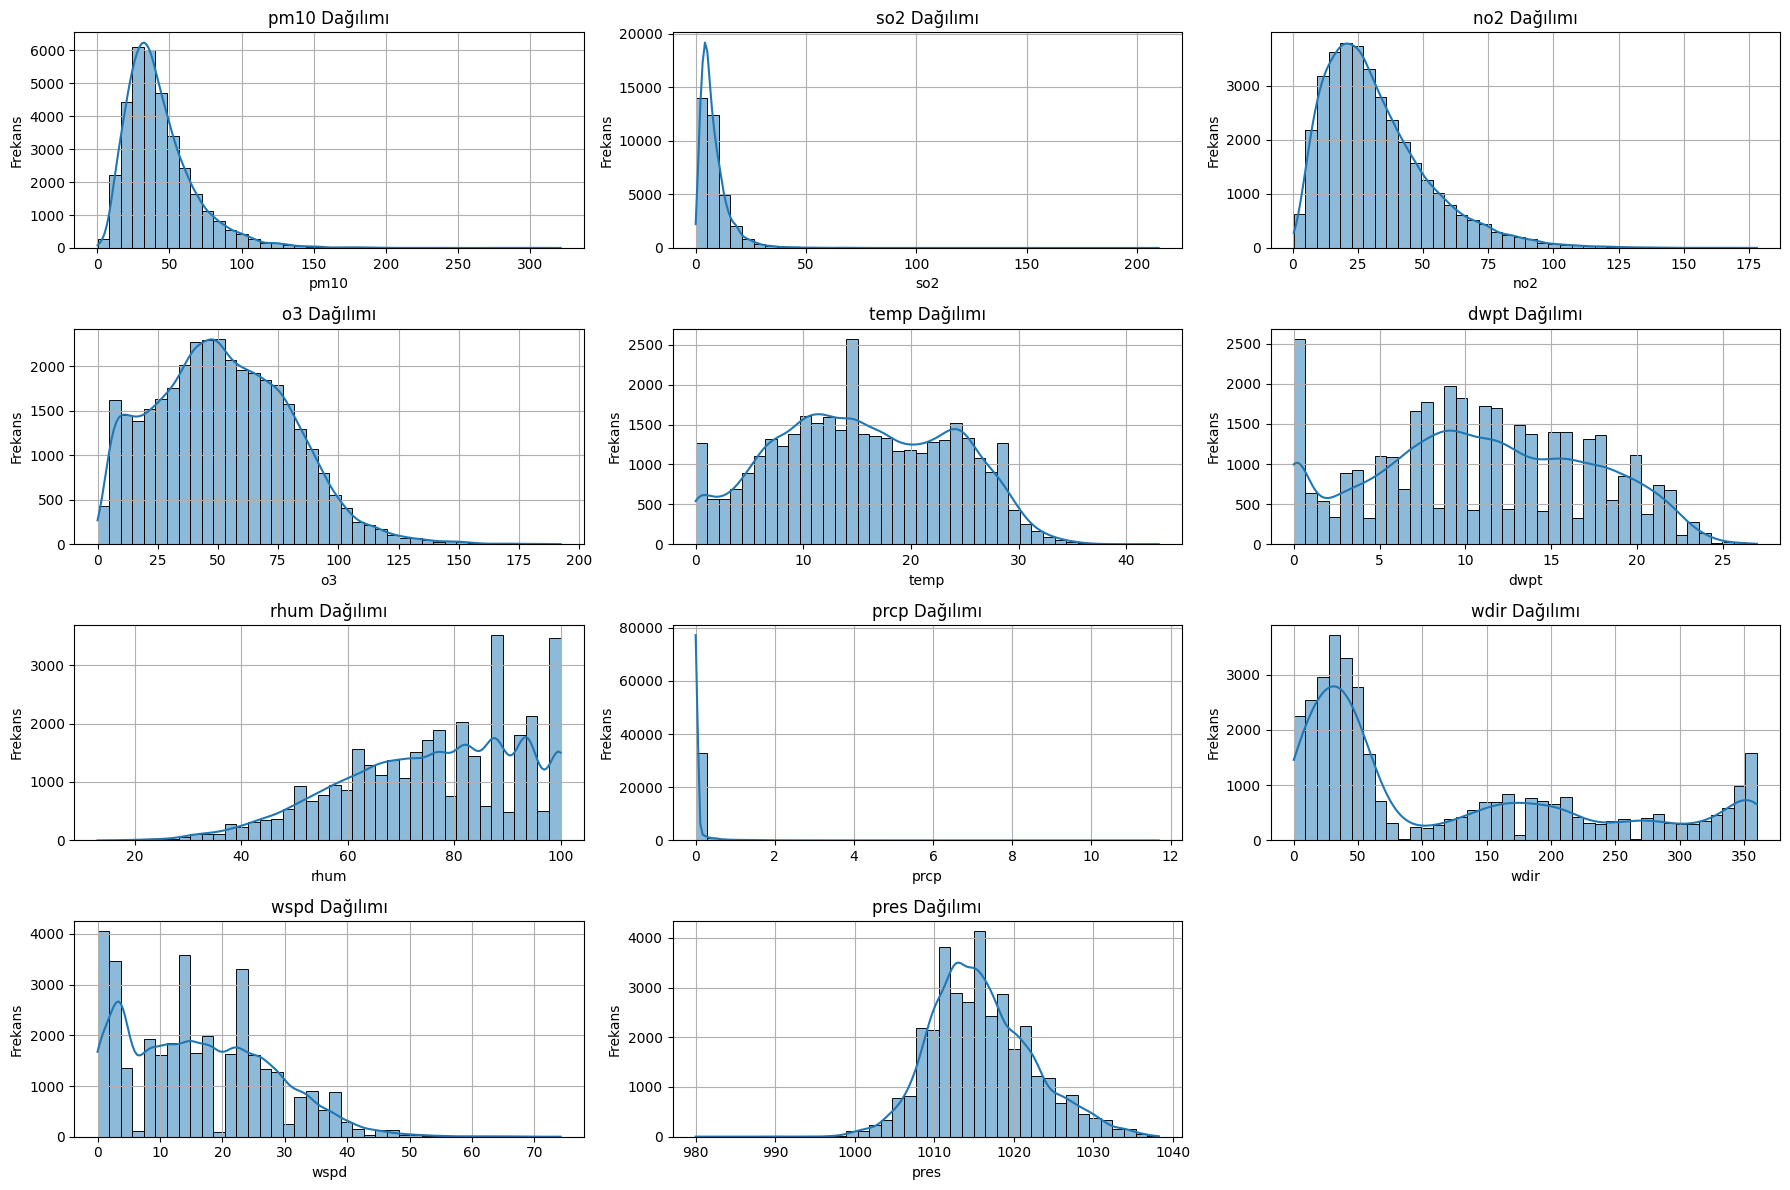

In [151]:
# Tüm sayısal değişkenler için histogramları çizelim
numeric_cols = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']

# Grafikleri 4x3 ızgara halinde çiz
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col].dropna(), bins=40, kde=True)
    plt.title(f"{col} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.grid(True)

plt.tight_layout()
plt.show()

🟦 Kirletici Değişkenler

| Değişken | Dağılım Özelliği     | Gözlem                                                                   |
| -------- | -------------------- | ------------------------------------------------------------------------ |
| **pm10** | Şiddetli sağa çarpık | Düşük değerlerde yığılma, 300+ aykırı değerler mevcut.                   |
| **so2**  | Aşırı sağa çarpık    | 0–10 µg/m³ aralığında sıkışma, nadir ama çok yüksek değerler var.        |
| **no2**  | Sağa çarpık          | 20–40 arası yoğunluk, 100+ değerler aykırı olabilir.                     |
| **o3**   | Asimetrik çift modlu | Ozonun hem düşük hem yüksek periyotları var → fotokimyasal süreç etkisi. |

🟩 Meteorolojik Değişkenler

| Değişken               | Dağılım Özelliği           | Gözlem                                                                                    |
| ---------------------- | -------------------------- | ----------------------------------------------------------------------------------------- |
| **temp** (sıcaklık)    | Simetriye yakın, çok modlu | Mevsimsel değişim açık; düşük sıcaklıklar kışa, yüksekler yaza işaret ediyor.             |
| **dwpt** (çiy noktası) | Hafif sağa çarpık          | Nemin doygunluk noktaları mevsime göre değişiyor.                                         |
| **rhum** (bağıl nem)   | Ters çarpık (sola)         | Değerler 70–100 arası yoğunlaşmış. Doğrusal olmayan ilişki kurmak gerekebilir.            |
| **prcp** (yağış)       | Aşırı sağa çarpık          | 0 değeri baskın, pozitif değerler nadir ama yüksek (bu zaten incelenmişti).               |
| **wdir** (rüzgar yönü) | Dairesel yapı – iki tepe   | 0–50 ve 300–360 derece arası baskın yönler var (muhtemelen kuzey-kuzeydoğu ve kuzeybatı). |
| **wspd** (rüzgar hızı) | Sağa çarpık                | 0–20 km/s arası yoğunluk, fırtına etkisiyle 60+ uç değerler mevcut.                       |
| **pres** (basınç)      | Normale yakın, çan eğrisi  | Sağlam sensör ölçümü, regresyon için uygundur.                                            |


In [ ]:
# Gerekli dönüşümleri uygulayarak modellemeye hazır veri seti oluşturalım

# 1. Log dönüşümü uygulanacak değişkenler
log_cols = ['prcp', 'pm10', 'so2', 'no2']
for col in log_cols:
    df[f'{col}_log'] = np.log1p(df[col])

# 2. Rüzgar yönü için sin-cos dönüşümü (çembersel)
df['wdir_rad'] = np.deg2rad(df['wdir'])
df['wdir_sin'] = np.sin(df['wdir_rad'])
df['wdir_cos'] = np.cos(df['wdir_rad'])

# 3. Kullanılmayacak veya dönüşüm sonrası gerek kalmayan sütunları çıkar
drop_cols = ['prcp', 'pm10', 'so2', 'no2', 'wdir', 'wdir_rad']
df_model = df.drop(columns=drop_cols)

# 4. Yeni sütun sıralamasını düzenle (isteğe bağlı)
ordered_cols = ['datetime', 'o3', 'temp', 'dwpt', 'rhum', 'wspd', 'pres',
                'prcp_log', 'pm10_log', 'so2_log', 'no2_log',
                'wdir_sin', 'wdir_cos']

# Eğer tarih bilgisi kullanılmayacaksa datetime dışlanabilir
df_model = df_model[[col for col in ordered_cols if col in df_model.columns]]

# 5. Son veri setini gösterelim
df_model.info(), df_model.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2021-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35064 non-null  datetime64[ns]
 1   o3        35064 non-null  float64       
 2   temp      35064 non-null  float64       
 3   dwpt      35064 non-null  float64       
 4   rhum      35064 non-null  float64       
 5   wspd      35064 non-null  float64       
 6   pres      35064 non-null  float64       
 7   prcp_log  35064 non-null  float64       
 8   pm10_log  35064 non-null  float64       
 9   so2_log   35064 non-null  float64       
 10  no2_log   35064 non-null  float64       
 11  wdir_sin  35064 non-null  float64       
 12  wdir_cos  35064 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 3.7 MB


(None,
                                datetime     o3  temp  dwpt  rhum  wspd    pres  prcp_log  pm10_log   so2_log   no2_log      wdir_sin  wdir_cos
 datetime                                                                                                                                      
 2021-01-01 00:00:00 2021-01-01 00:00:00  55.56  11.9   9.5  85.0  18.4  1014.5  0.000000  3.048325  2.071913  2.417698  1.224647e-16 -1.000000
 2021-01-01 01:00:00 2021-01-01 01:00:00  51.94  11.0   9.1  88.0  14.8  1014.0  0.139252  2.948116  2.221375  2.613007 -9.848078e-01 -0.173648
 2021-01-01 02:00:00 2021-01-01 02:00:00  66.38  11.0  10.1  94.0   7.6  1014.0  0.130178  3.307619  1.891605  2.195000  5.000000e-01 -0.866025
 2021-01-01 03:00:00 2021-01-01 03:00:00  69.10  10.1   9.2  94.0   9.4  1014.6  0.161670  3.263467  1.247032  1.731656  1.736482e-01 -0.984808
 2021-01-01 04:00:00 2021-01-01 04:00:00  67.40  11.0  10.1  94.0   7.6  1015.0  0.127419  3.228034  1.124930  1.501853 -6.427876

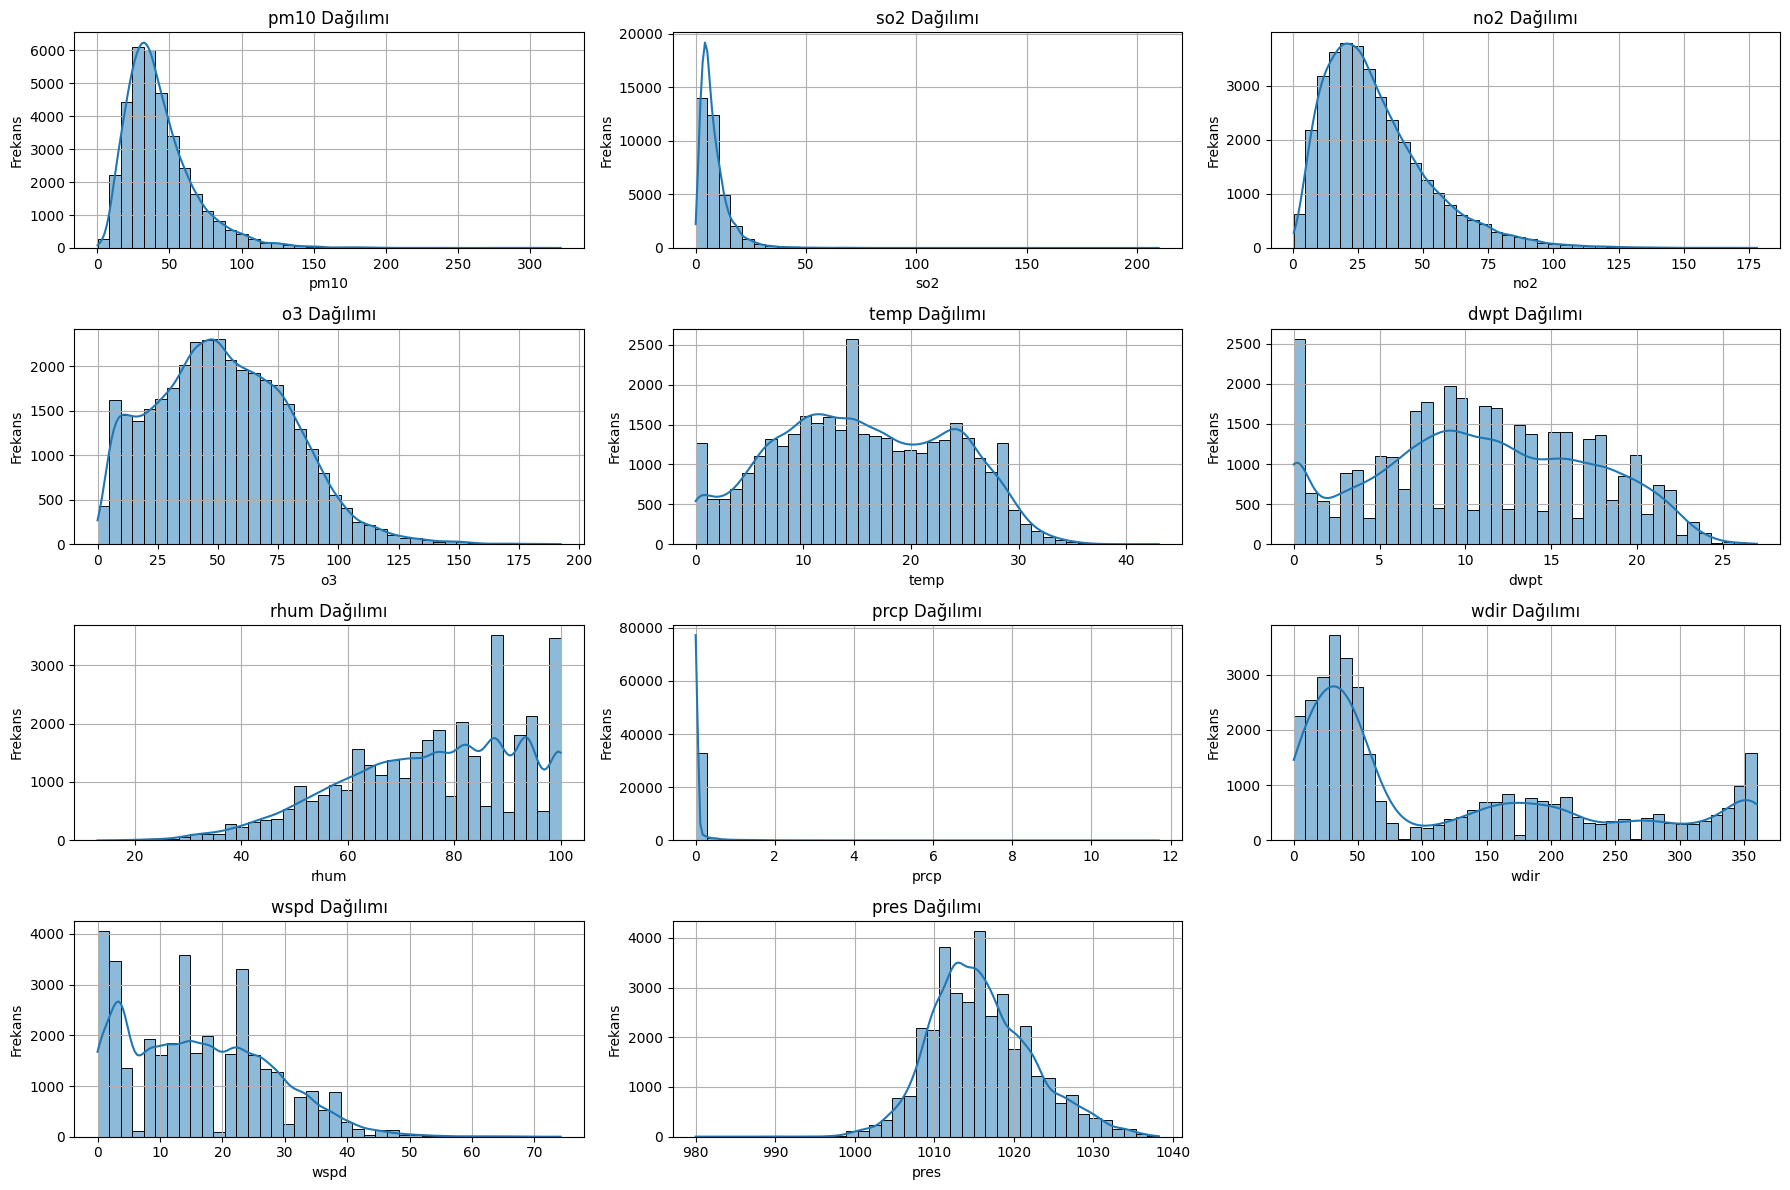

In [ ]:
# Tüm sayısal değişkenler için histogramları çizelim
numeric_cols = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']

# Grafikleri 4x3 ızgara halinde çiz
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col].dropna(), bins=40, kde=True)
    plt.title(f"{col} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.grid(True)

plt.tight_layout()
plt.show()

🎯 Kazanımlar:

| Özellik                            | Etki                                                      |
| ---------------------------------- | --------------------------------------------------------- |
| **Aykırı değer baskısı azalmış**   | Uç değerler sıkıştırılmış                                 |
| **Model stabilitesi artmış**       | Regresyon, karar ağacı gibi yöntemlerde hata payı düşer   |
| **Daha düzgün dağılımlar**         | Korelasyon, varyans analizi gibi tekniklere daha uygundur |
| **`wdir` çembersel yapı korunmuş** | Açısal dönüşüm sayesinde yön bilgisi kaybolmamış olur     |


## Korelasyon Analizi

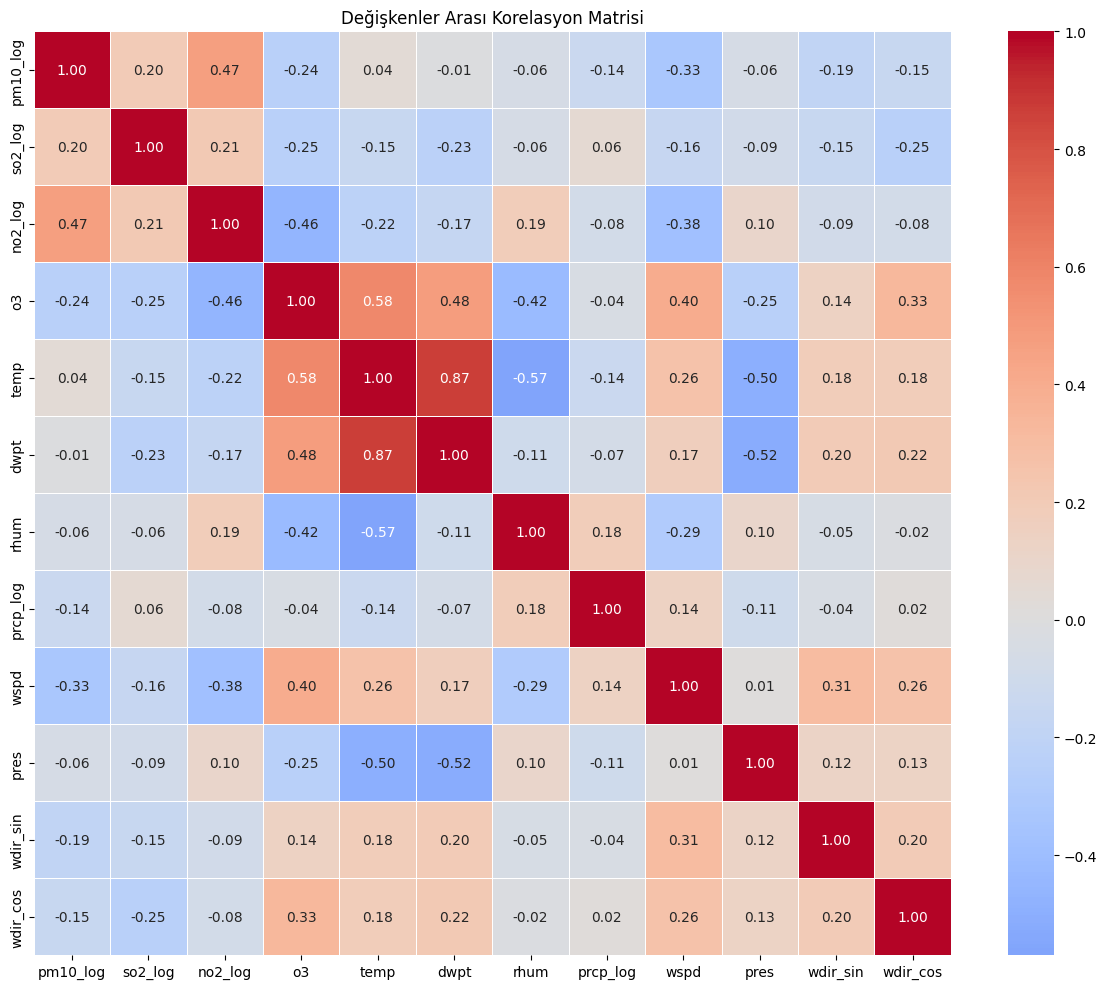

In [152]:
# log dönüşümü gereken değişkenler
for col in ['pm10', 'so2', 'no2', 'prcp']:
    df[f'{col}_log'] = np.log1p(df[col])

# wdir için sin/cos dönüşümü
df['wdir_rad'] = np.deg2rad(df['wdir'])
df['wdir_sin'] = np.sin(df['wdir_rad'])
df['wdir_cos'] = np.cos(df['wdir_rad'])

# Korelasyon analizi için seçilecek sütunlar
corr_cols = ['pm10_log', 'so2_log', 'no2_log', 'o3', 'temp', 'dwpt', 'rhum',
             'prcp_log', 'wspd', 'pres', 'wdir_sin', 'wdir_cos']

# Korelasyon matrisi
corr_df = df[corr_cols].corr(method='pearson').round(2)

# Görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Değişkenler Arası Korelasyon Matrisi")
plt.tight_layout()
plt.show()


pm10_log hedef değişken olarak seçelim Çünkü: En yaygın hava kalitesi göstergesidir.

Diğer değişkenlerle anlamlı korelasyonlara sahip (temp, wspd, pres, no2_log gibi)

Zaten log1p() ile normalize edilmiş durumda.

Korelasyon Hesaplama
 corr() fonksiyonu ile de i_kenler
aras1ndaki ili_kiler analiz edilir.
Pearson, Spearman ve Kendall gibi
farkl1 korelasyon yöntemleri, veri
tipine ve da 1l1m1na göre
seçilmelidir.

Is1 Hartalar1 le
Görselle_trme
 Is1 haritalar1, çok boyutlu veri
setlerindeki ili_kileri görsel olarak
anlamak için etkili araçlard1r.
Özellikle sns.heatmap() fonksiyonu,
korelasyon matrislerini renk
kodlar1yla göstererek, güçlü ili_kileri
h1zl1ca tespit etmeyi sa lar

Doğru Yorumlama
 Korelasyon analizi, modelleme
için önemli ipuçları verse de
"korelasyon nedensellik
değildir" prensibi
hat1rlanmal1d1r. Güçlü
korelasyonlar, hipotez
olu_turma ve daha detayl1
analizler için yol gösterici olarak
kullan1lmal1d1r.

## Kategorik Veri Analizi

 Kategorik veriler, s1n1rl1 say1da olas1 de er alan ve genellikle nominal veya ordinal ölçeklerde ifade edilen veri
türleridir. Bu tür verilerin analizi, örüntüleri ke_fetmek ve da 1l1m özelliklerini anlamak için kritik öneme sahiptir.

## Çok Değişkenli Analiz

 scatter_matrix() ve pairplot() kullan1larak çok de i_kenli analiz yap1l1r. AI ile de i_kenler aras1 ili_kilerin
yorumlanmas1 sa lan1r. Çok de i_kenli analiz, verideki karma_1k ili_kileri ortaya ç1kar1r.


In [153]:
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Otomatik EDA Raporlama

🎯 EDA Raporu Ne Anlatır?
1. Veri Kümesi Genel Görünüm (Overview / Dataset statistics)
Gözlem ve sütun sayısı

Sayısal, kategorik ve zaman serisi değişken sayıları

Boş hücre sayısı ve oranı

Duplikasyon (tekrarlı satırlar)

📌 Yarar: Veri boyutunu ve temizlik ihtiyacını hızlıca görürsün.

2. Değişkenler (Variables)
Her bir değişken için:

Türü (sayısal, kategorik vs.)

Benzersiz değer sayısı

Aykırı değer sayısı

Eksik değer oranı

Minimum, maksimum, ortalama, çeyrekler

📌 Yarar: Hangi değişkenin ne kadar bilgi taşıdığını, aykırı/eksik olup olmadığını kolayca gözlemlersin.

3. Eksik Veriler (Missing Values)
Hangi değişkende ne kadar eksik veri var?

Eksik verilerdeki desenler (örneğin bir grup değişkende hep birlikte eksik olma)

📌 Yarar: Eksik veri stratejisi geliştirmeni sağlar (örneğin silme, ortalama ile doldurma, modelleme).

4. Dağılımlar (Distributions)
Her değişken için histogram, boxplot, kernel density (yoğunluk) grafikleri

Aykırı değerler görsel olarak tespit edilir.

📌 Yarar: Normal dağılıma uygunluk, dönüşüm ihtiyacı (log, sqrt gibi) analiz edilir.

5. Korelasyon Matrisi (Correlations)
Sayısal değişkenler arasındaki ilişki

Spearman, Pearson veya Kendall korelasyon katsayılarıyla

📌 Yarar: Hedef değişken ile ilişkili bağımsız değişkenleri tespit etmek ve çoklu bağlantıları görmek.

6. Etkileşimler (Interactions)
İki değişkenin birlikte dağılımları (jointplot, pairplot)

📌 Yarar: Değişken çiftleri arasındaki doğrusal veya doğrusal olmayan ilişkiyi keşfetmek.

7. Zaman Serisi Görselleştirmeleri (Varsa datetime)
Trend, mevsimsellik ve değişkenlerin zamana göre değişimi

📌 Yarar: Özellikle hava kalitesi gibi zamanla değişen verilerde mevsimsel veya trend etkilerini analiz etmek.

🛠️ EDA Raporunu Nasıl Kullanmalısın?
Amaç	Kullanım Önerisi
Veri Temizleme	Eksik, aykırı veya anlamlı olmayan verileri tespit et ve düzelt.
Modelleme Öncesi	Hangi değişkenleri modele alacağını, hangilerini dışarda bırakacağını belirle.
Özellik Mühendisliği	Gerekirse dönüşüm (ör. log), etkileşim ya da kategori birleştirme uygula.
Model Sonrası Yorumlama	Modelin öngörülerini daha iyi yorumlamak için veri yapısını iyi tanı.

📌 Akademik Not
EDA, veriye dayalı karar verme sürecinin ilk ve vazgeçilmez adımıdır (Tukey, 1977). EDA yapılmadan doğrudan modelleme yapmak; bir harita olmadan ormanda yön bulmaya çalışmak gibidir. Modern veri bilimi yaklaşımlarında, EDA süreci görselleştirme ile birlikte düşünülür.

İstersen şu anda birlikte bir EDA raporu oluşturup, çıktıları üzerinden analiz yapabiliriz. Elinde çalışmakta olduğun veri setiyle başlayalım mı?










In [154]:
!pip install ydata-profiling

import pandas as pd
from ydata_profiling import ProfileReport

# Profil raporu oluştur
profile = ProfileReport(df, title="Bandırma Hava Kalitesi Veri Seti - Otomatik EDA Raporu", explorative=True)

# Raporu HTML olarak kaydet
report_path = "/content/drive/MyDrive/hava_kalitesi/eda_raporu.html"
profile.to_file(report_path)

report_path


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 37/37 [00:02<00:00, 16.09it/s]
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

'/content/drive/MyDrive/hava_kalitesi/eda_raporu.html'

Pandas-profiling kullan1kullanılarak otomatik EDA raporlar1 oluşturulur.
Verinin genel durumu hakk1nda h1zl1ca bilgi edinilir

# Feature Engineering

Feature engineering için
AI önerileri alınır. Modelin
performansını arttırmak
için yeni özellikler
oluşturulur

# Model Seçimi

 Model seçimi ve
hiperparametre
optimizasyonu
tavsiyeleri al1n1r. En
uygun model belirlenir.


HAVA KALİTESİ İNDEKSİ

Hava Kalitesi indeksi (HKİ), hava kalitesinin günlük olarak rapor edilmesi için kullanılan bir indekstir. Yaşadığımız bölgenin havasının ne kadar temiz veya kirli olduğu ve ne tür sağlık etkilerinin oluşabileceği konusunda bilgiler verir.

Hava kalitesi indeksi, farklı hava kalitesi seviyeleri ile birlikte bunların genel halk sağlığı üzerindeki etkisini ve sağlıksız seviyeye yükseldiğinde alınması gereken kademeleri de belirler. Ulusal Hava Kalitesi İndeksi, EPA Hava Kalitesi İndeksini ulusal mevzuatımız ve sınır değerlerimize uyarlayarak oluşturulmuştur. 5 temel kirletici için hava kalitesi indeksi hesaplanmaktadır.

Bunlar; partikül maddeler (PM10), karbonmonoksit (CO), kükürtdioksit (SO2), azotdioksit (NO2) ve ozon (O3) dur. Hava kalitesi indeksi 6 kategoriden oluşmaktadır. Matematiksel hesaplama yoktur, yalnızca sınıflandırmadır. En yüksek kirletici için belirlenen değer indeks değeridir.

kaynak:
https://dathm.csb.gov.tr/hava-kalitesi-indeksi-i-89066

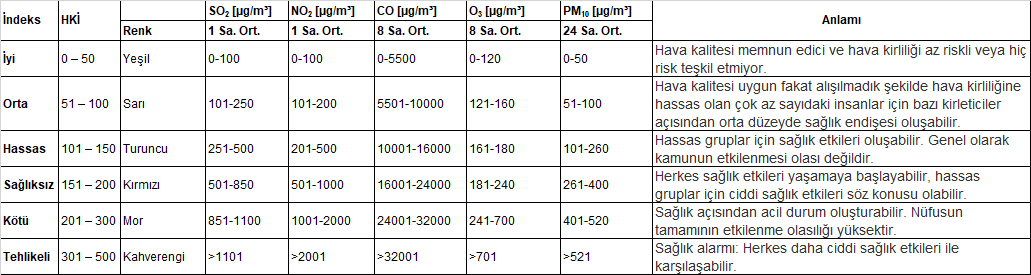

In [155]:
# EPA HKİ hesaplama fonksiyonu
def calculate_hki(C, bp_lo, bp_hi, i_lo, i_hi):
    return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (C - bp_lo) + i_lo

# HKİ eşiklerini her kirletici için tanımlayalım
hki_breakpoints = {
    'pm10': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 260, 101, 150),
             (261, 400, 151, 200), (401, 520, 201, 300), (521, 1000, 301, 500)],
    'so2': [(0, 100, 0, 50), (101, 250, 51, 100), (251, 500, 101, 150),
            (501, 850, 151, 200), (851, 1100, 201, 300), (1101, 3000, 301, 500)],
    'no2': [(0, 100, 0, 50), (101, 200, 51, 100), (201, 500, 101, 150),
            (501, 1000, 151, 200), (1001, 2000, 201, 300), (2001, 4000, 301, 500)],
    'o3': [(0, 120, 0, 50), (121, 160, 51, 100), (161, 180, 101, 150),
           (181, 240, 151, 200), (241, 700, 201, 300), (701, 2000, 301, 500)],
}

# İlk 5000 satır üzerinden HKİ hesaplama
df_sample = df.head(5000).copy()

# Her kirletici için HKİ sütunlarını oluştur
for pollutant, ranges in hki_breakpoints.items():
    hki_values = []
    for value in df_sample[pollutant]:
        hki = None
        for bp_lo, bp_hi, i_lo, i_hi in ranges:
            if bp_lo <= value <= bp_hi:
                hki = calculate_hki(value, bp_lo, bp_hi, i_lo, i_hi)
                break
        hki_values.append(hki if hki is not None else 0)
    df_sample[f'hki_{pollutant}'] = hki_values

# Genel HKİ: her satırda en yüksek olan değer
df_sample['hki_genel'] = df_sample[[f'hki_{p}' for p in hki_breakpoints]].max(axis=1)

# Sonuçların ilk satırlarını göster
df_sample[[f'hki_{p}' for p in hki_breakpoints] + ['hki_genel']].head()


,hki_pm10,hki_so2,hki_no2,hki_o3,hki_genel
datetime,,,,,
2021-01-01 00:00:00,20.08,3.470,5.110,23.150000,23.150000
2021-01-01 01:00:00,18.07,4.110,6.320,21.641667,21.641667
2021-01-01 02:00:00,26.32,2.815,3.990,27.658333,27.658333
2021-01-01 03:00:00,25.14,1.240,2.325,28.791667,28.791667
2021-01-01 04:00:00,24.23,1.040,1.745,28.083333,28.083333


In [156]:
# HKİ değerlerini sınıflara ayıran fonksiyon
def hki_siniflandir(hki):
    if hki <= 50:
        return "İyi"
    elif hki <= 100:
        return "Orta"
    elif hki <= 150:
        return "Hassas"
    elif hki <= 200:
        return "Sağlıksız"
    elif hki <= 300:
        return "Kötü"
    else:
        return "Tehlikeli"

# Yeni sütunu oluştur
df_sample['hki_kategori'] = df_sample['hki_genel'].apply(hki_siniflandir)

# Her sınıfın frekansını görelim
kategori_frekans = df_sample['hki_kategori'].value_counts().sort_index()
kategori_frekans


,count
hki_kategori,
Hassas,183
Orta,1462
İyi,3355



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



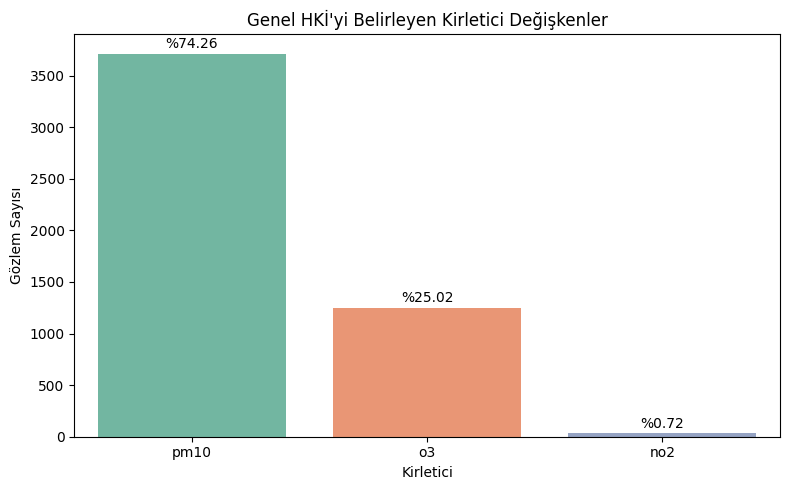

,Kirletici,Sayı,Yüzde (%)
0,pm10,3713,74.26
1,o3,1251,25.02
2,no2,36,0.72


In [157]:
# Belirleyici kirletici sütunu tanımlı değilse tekrar oluşturalım
hki_columns = [f'hki_{p}' for p in ['pm10', 'so2', 'no2', 'o3']]
df_sample['hki_kaynak'] = df_sample[hki_columns].idxmax(axis=1).str.replace('hki_', '')

# Sayı ve yüzde hesapla
total_rows = len(df_sample)
hki_kaynak_yuzde = df_sample['hki_kaynak'].value_counts().reset_index()
hki_kaynak_yuzde.columns = ['Kirletici', 'Sayı']
hki_kaynak_yuzde['Yüzde (%)'] = (hki_kaynak_yuzde['Sayı'] / total_rows * 100).round(2)

# Görselleştirme - Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=hki_kaynak_yuzde, x='Kirletici', y='Sayı', palette='Set2')

# Değerleri çubuk üzerine yazalım
for index, row in hki_kaynak_yuzde.iterrows():
    plt.text(index, row.Sayı + 50, f"%{row['Yüzde (%)']}", ha='center', fontsize=10)

plt.title("Genel HKİ'yi Belirleyen Kirletici Değişkenler")
plt.ylabel("Gözlem Sayısı")
plt.xlabel("Kirletici")
plt.tight_layout()
plt.show()

# Tabloyu da tekrar göster
hki_kaynak_yuzde


| Renk    | AQI Aralığı | Anlamı         |
| ------- | ----------- | -------------- |
| Yeşil   | 0–50        | İyi            |
| Sarı    | 51–100      | Orta           |
| Turuncu | 101–150     | Hassas Gruplar |
| Kırmızı | 151–200     | Sağlıksız      |
| Mor     | 201–300     | Çok Sağlıksız  |
| Kahverengi   | 301–500     | Tehlikeli      |


<Figure size 1200x600 with 0 Axes>

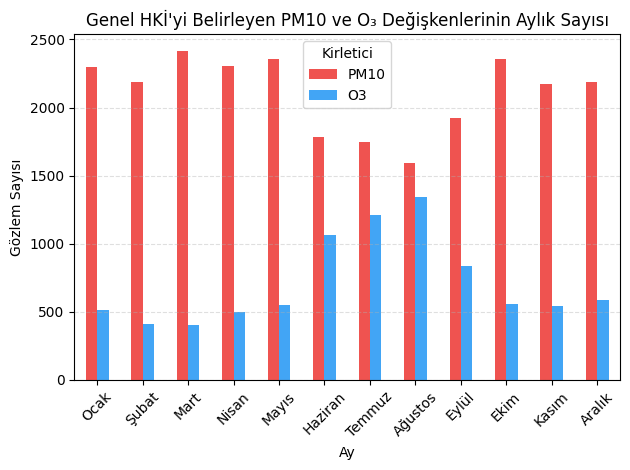

In [158]:
# Add 'hki_kaynak' and 'ay_ad' columns to the main df DataFrame

# Belirleyici kirletici sütunu tanımlı değilse tekrar oluşturalım
hki_columns = [f'hki_{p}' for p in ['pm10', 'so2', 'no2', 'o3']]

# Calculate HKİ for the entire df DataFrame
for pollutant, ranges in hki_breakpoints.items():
    hki_values = []
    for value in df[pollutant]:
        hki = None
        for bp_lo, bp_hi, i_lo, i_hi in ranges:
            if bp_lo <= value <= bp_hi:
                hki = calculate_hki(value, bp_lo, bp_hi, i_lo, i_hi)
                break
        hki_values.append(hki if hki is not None else 0)
    df[f'hki_{pollutant}'] = hki_values

df['hki_kaynak'] = df[hki_columns].idxmax(axis=1).str.replace('hki_', '')

# Add 'ay_ad' column to the main df DataFrame
ay_sira = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
           'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
df['ay_ad'] = df['month'].apply(lambda x: ay_sira[x-1])


# PM10 ve O3 değişkenlerinin HKİ'yi belirlediği gözlemler için aylık toplam sayıları hesaplayalım
pm10_ay_sayim = df[df['hki_kaynak'] == 'pm10']['ay_ad'].value_counts().reindex(ay_sira, fill_value=0)
o3_ay_sayim = df[df['hki_kaynak'] == 'o3']['ay_ad'].value_counts().reindex(ay_sira, fill_value=0)

# Verileri birleştir
aylik_kaynak_df = pd.DataFrame({'PM10': pm10_ay_sayim, 'O3': o3_ay_sayim})
aylik_kaynak_df.index.name = 'Ay'

# Bar plot
plt.figure(figsize=(12, 6))
aylik_kaynak_df.plot(kind='bar', stacked=False, color=['#ef5350', '#42a5f5'])

plt.title("Genel HKİ'yi Belirleyen PM10 ve O₃ Değişkenlerinin Aylık Sayısı")
plt.xlabel("Ay")
plt.ylabel("Gözlem Sayısı")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="Kirletici")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

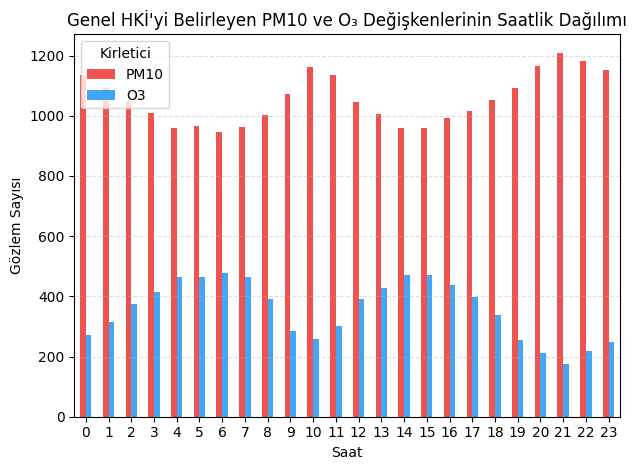

In [159]:
# Saat bilgisi sütununu oluşturalım
df['saat'] = df['datetime'].dt.hour

# PM10 ve O3 için saatlik HKİ belirleyici sayımları
pm10_saat_sayim = df[df['hki_kaynak'] == 'pm10']['saat'].value_counts().sort_index()
o3_saat_sayim = df[df['hki_kaynak'] == 'o3']['saat'].value_counts().sort_index()

# Birleştir
saatlik_kaynak_df = pd.DataFrame({'PM10': pm10_saat_sayim, 'O3': o3_saat_sayim})
saatlik_kaynak_df.index.name = 'Saat'

# Bar plot
plt.figure(figsize=(12, 6))
saatlik_kaynak_df.plot(kind='bar', stacked=False, color=['#ef5350', '#42a5f5'])

plt.title("Genel HKİ'yi Belirleyen PM10 ve O₃ Değişkenlerinin Saatlik Dağılımı")
plt.xlabel("Saat")
plt.ylabel("Gözlem Sayısı")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="Kirletici")
plt.tight_layout()
plt.show()


📊 Bar Grafiği – PM10 ve O₃ Kirleticilerinin HKİ’yi Belirlediği Saatlik Dağılım

🔍 Gözlemler:

🟥 PM10 (Partikül Madde 10 mikron):
En yoğun olarak 08:00–11:00 ve 19:00–22:00 saatleri arasında HKİ’yi belirliyor.

Bu saatler, trafik yoğunluğu, ısınma faaliyetleri ve hava sirkülasyonunun zayıf olduğu zaman dilimleriyle çakışır.

🔷 O₃ (Ozon):
En belirgin etki 13:00–17:00 saatleri arasında görülüyor.

Bu zaman dilimi, güneş ışınımının en güçlü olduğu saatlerdir ve fotokimyasal reaksiyonların artmasıyla ozon seviyeleri yükselir.

📌 Yorum:

PM10: Günün başında ve sonunda etkili → insan kaynaklı emisyonlarla (trafik, ısınma) ilişkili.

O₃: Öğle saatlerinde pik yapıyor → atmosferik fotokimyasal süreçler sonucu oluşur.

Bu analiz, saatlik bazda alınacak önlemler için çok değerli bir içgörü sağlar. İstersen bu desenleri hafta içi/hafta sonu gibi başka zaman bileşenleriyle de inceleyebiliriz. Devam edelim mi?

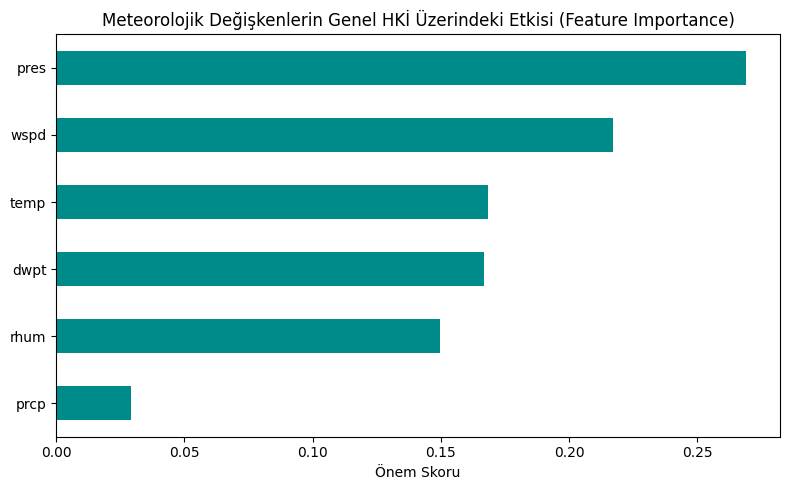

Meteorological Feature Importances for General HKİ:


,0
prcp,0.029320
rhum,0.149849
dwpt,0.166643
temp,0.168343
wspd,0.217008
pres,0.268837


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate 'hki_genel' for the entire df DataFrame
hki_columns = [f'hki_{p}' for p in ['pm10', 'so2', 'no2', 'o3']]
df['hki_genel'] = df[hki_columns].max(axis=1)

# Define meteorological variables
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'pres']

# Create the feature matrix X and the target variable y
X = df[meteorolojik]
y = df['hki_genel']

# Drop rows with any missing values in the meteorological columns for both X and y
# This ensures that X and y have the same number of samples after dropping missing values.
valid_indices = X.dropna().index
X = X.loc[valid_indices]
y = y.loc[valid_indices]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()

# Visualize feature importances
plt.figure(figsize=(8, 5))
importances.plot(kind='barh', color='darkcyan')
plt.title("Meteorolojik Değişkenlerin Genel HKİ Üzerindeki Etkisi (Feature Importance)")
plt.xlabel("Önem Skoru")
plt.tight_layout()
plt.show()

# Display importances
print("Meteorological Feature Importances for General HKİ:")
display(importances)

<Figure size 1000x600 with 0 Axes>

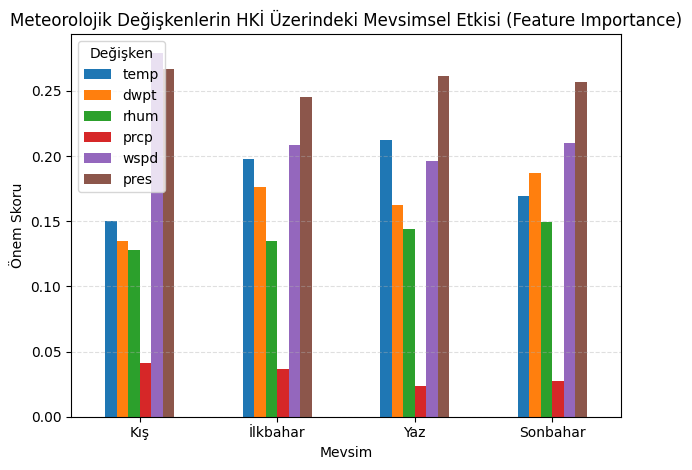

,Kış,İlkbahar,Yaz,Sonbahar
temp,0.150252,0.197842,0.212199,0.169546
dwpt,0.134557,0.176345,0.162443,0.186744
rhum,0.127830,0.135049,0.144084,0.149461
prcp,0.041384,0.036505,0.023684,0.027781
wspd,0.279376,0.208646,0.196354,0.209666
pres,0.266602,0.245612,0.261235,0.256802


In [167]:
from sklearn.ensemble import RandomForestRegressor


df['mevsim'] = df['datetime'].dt.month.apply(ay_to_mevsim)
df['saat'] = df['datetime'].dt.hour

# Şimdi yeniden mevsimsel feature importance analizini yapalım
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'pres']
mevsim_sonuclar = {}

for mevsim in df['mevsim'].unique():
    df_mevsim = df[df['mevsim'] == mevsim]
    X = df_mevsim[meteorolojik].copy() # Create a copy to avoid SettingWithCopyWarning
    y = df_mevsim['hki_genel'].copy() # Create a copy to avoid SettingWithCopyWarning

    # Drop rows with any missing values in the meteorological columns for both X and y
    valid_indices = X.dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]

    if len(X) > 100:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)
        importances = pd.Series(model.feature_importances_, index=X.columns)
        mevsim_sonuclar[mevsim] = importances

# Verileri DataFrame'e dönüştür ve görselleştir
df_importance_mevsim = pd.DataFrame(mevsim_sonuclar)

# Görselleştirme
plt.figure(figsize=(10, 6))
df_importance_mevsim.T.plot(kind='bar', stacked=False)
plt.title("Meteorolojik Değişkenlerin HKİ Üzerindeki Mevsimsel Etkisi (Feature Importance)")
plt.ylabel("Önem Skoru")
plt.xlabel("Mevsim")
plt.xticks(rotation=0)
plt.legend(title="Değişken")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

df_importance_mevsim

In [168]:
# Google Colab ortamında SHAP kütüphanesini yükleyelim
!pip install shap

In [170]:
import shap
from sklearn.ensemble import RandomForestRegressor

meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'pres']

# Select and sample the data, dropping any rows with missing meteorological or hki_genel values
df_sample = df[meteorolojik + ['hki_genel']].dropna().sample(n=5000, random_state=42)

# Define X and y using the sampled data
X = df_sample[meteorolojik]
y = df_sample['hki_genel']

# Train a RandomForestRegressor model on the sampled data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP değerlerini hesapla using the same sampled data X
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP özeti – değişkenlerin genel HKİ'ye katkısı
shap.summary_plot(shap_values, X)

100%|===================| 4989/5000 [06:20<00:00]       

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 39.964507, while the model output was 44.202536. If this difference is acceptable you can set check_additivity=False to disable this check.

In [177]:
# Veri setini zaman serisi analizine uygun hale getirelim
# Sadece datetime, hki_genel ve meteorolojik sütunlarıyla çalışacağız
df_model = df[['datetime', 'hki_genel', 'temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'pres']].copy()

# Saatlik sıralamayı ve indekslemeyi yapalım
# Drop the 'datetime' column before setting it as index to avoid ambiguity
df_model = df_model.sort_values('datetime').set_index('datetime')

# 6 gün * 24 saat = 144 saatlik ileri tahmin için hedef sütun oluştur
df_model['hki_genel_gelecek'] = df_model['hki_genel'].shift(-144)

# Gecikmeli (lag) özellikler: önceki 3 saatin HKİ değeri
df_model['hki_lag_1'] = df_model['hki_genel'].shift(1)
df_model['hki_lag_2'] = df_model['hki_genel'].shift(2)
df_model['hki_lag_3'] = df_model['hki_genel'].shift(3)

# Zaman bileşenleri: saat, gün, ay
df_model['saat'] = df_model.index.hour
df_model['gun'] = df_model.index.dayofweek
df_model['ay'] = df_model.index.month

# İlk ve son boşluklar oluştuğu için eksik satırları düşürelim
df_model = df_model.dropna()

# Özellikler ve hedef değişken
X = df_model.drop(columns=['hki_genel_gelecek'])
y = df_model['hki_genel_gelecek']

# Eğitim ve test seti
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Model: XGBoost
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Gerçek", alpha=0.7)
plt.plot(y_pred, label="Tahmin", alpha=0.7)
plt.title("6 Gün İleri Saatlik HKİ Tahmini")
plt.xlabel("Zaman (saatlik indeks)")
plt.ylabel("HKİ")
plt.legend()
plt.tight_layout()
plt.show()

rmse, r2

ValueError: 'datetime' is both an index level and a column label, which is ambiguous.

////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
!pip install meteostat

# Meteostat kütüphanesi ve bağımlılıklarını içe aktar
from datetime import datetime
from meteostat import Hourly

# Zaman aralığını ayarla
start = datetime(2021, 1, 1)
end = datetime(2025, 1, 1, 1, 0)

# Saatlik veriyi al
datam = Hourly('17115', start, end)  # 17115 İstasyon Tanımlayıcısı BANDIRMA TANIMLAYICI KODU
datam = datam.fetch()

# DataFrame'i yazdır
print(datam)
datam = Hourly('17115', start, end)  # 17115 İstasyon Tanımlayıcısı BANDIRMA TANIMLAYICI KODU
datam = datam.fetch()

# DataFrame'i yazdır
print(datam)

                     temp  dwpt   rhum  prcp  snow   wdir  wspd  wpgt    pres  tsun  coco
time                                                                                     
2021-01-01 00:00:00  11.9   9.5   85.0   NaN   NaN  180.0  18.4   NaN  1014.5   NaN  17.0
2021-01-01 01:00:00  11.0   9.1   88.0   NaN   NaN  260.0  14.8   NaN  1014.0   NaN  17.0
2021-01-01 02:00:00  11.0  10.1   94.0   NaN   NaN  150.0   7.6   NaN  1014.0   NaN  17.0
2021-01-01 03:00:00  10.1   9.2   94.0   NaN   NaN  170.0   9.4   NaN  1014.6   NaN  17.0
2021-01-01 04:00:00  11.0  10.1   94.0   NaN   NaN  220.0   7.6   NaN  1015.0   NaN  17.0
...                   ...   ...    ...   ...   ...    ...   ...   ...     ...   ...   ...
2024-12-31 21:00:00   2.1   1.7   97.0   0.0   NaN    0.0   0.0   NaN  1033.4   NaN   1.0
2024-12-31 22:00:00   1.0   1.0  100.0   0.0   NaN  100.0   1.8   NaN  1032.0   NaN   5.0
2024-12-31 23:00:00   1.0   1.0  100.0   0.0   NaN  260.0   1.8   NaN  1033.0   NaN   5.0
2025-01-01

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Bandirma_AQ.xlsx"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fkarabas/bandirma-aqi-2021-2024",
  file_path,)

In [ ]:
df.head()  # Varsayılan olarak ilk 5 satırı gösterir

,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2021,1,1,0,20.08,6.94,10.22,55.56,11.9,9.5,85,0.0,180.0,18.4,1014.5
1,2021,1,1,1,18.07,8.22,12.64,51.94,11.0,9.1,88,NaN,260.0,14.8,1014.0
2,2021,1,1,2,26.32,5.63,7.98,66.38,11.0,10.1,94,NaN,150.0,7.6,1014.0
3,2021,1,1,3,25.14,2.48,4.65,69.10,10.1,9.2,94,NaN,170.0,9.4,1014.6
4,2021,1,1,4,24.23,2.08,3.49,67.40,11.0,10.1,94,NaN,220.0,7.6,1015.0


In [ ]:
df.shape  # (satır sayısı, sütun sayısı)

(35064, 15)

In [ ]:
df.sample(6)  # Rastgele belirlenen sayıda satırı gösterir

,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
28044,2024,3,14,12,50.23,13.04,15.96,54.94,13.5,7.3,66,0.7,340.0,9.4,1014.5
18578,2023,2,14,2,35.70,6.47,78.73,NaN,-5.0,-6.0,93,0.0,300.0,3.6,1031.0
21624,2023,6,21,0,30.65,4.95,26.55,NaN,15.9,14.9,94,0.0,290.0,7.6,1016.5
11882,2022,5,11,2,26.87,4.16,36.15,49.29,11.0,10.1,94,0.0,50.0,16.6,1018.0
1665,2021,3,11,9,35.91,4.64,27.32,49.74,6.6,4.8,88,0.5,10.0,51.8,1012.3
1225,2021,2,21,1,50.94,14.63,30.91,58.01,2.6,0.0,83,0.0,21.0,11.2,1028.5


In [ ]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   pm10    32366 non-null  float64
 5   so2     33940 non-null  float64
 6   no2     33945 non-null  float64
 7   o3      22884 non-null  float64
 8   temp    35064 non-null  float64
 9   dwpt    35064 non-null  float64
 10  rhum    35064 non-null  int64  
 11  prcp    34778 non-null  float64
 12  wdir    35035 non-null  float64
 13  wspd    35064 non-null  float64
 14  pres    34902 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 4.0 MB


In [ ]:
df['rhum'] = df['rhum'].astype('float64')

In [ ]:
df.dtypes

,0
year,int64
month,int64
day,int64
hour,int64
pm10,float64
so2,float64
no2,float64
o3,float64
temp,float64
dwpt,float64


In [ ]:
df.nunique()

,0
year,4
month,12
day,31
hour,24
pm10,8934
so2,3184
no2,7854
o3,9691
temp,404
dwpt,345


In [ ]:
# Tüm sütunların gösterilmesi ve ekran genişliğinin arttırılması
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # DataFrame'in çok satıra bölünmesini engeller
pd.set_option('display.width', None)           # Genişliği sınırlama

# Kirletici ve meteorolojik değişkenlerin listesini tanımla
kirleticiler = ['pm10', 'so2', 'no2', 'o3']
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
selected_cols = kirleticiler + meteorolojik

df_selected = df[selected_cols]

print(df_selected.describe().T)

        count         mean         std     min      25%      50%      75%      max
pm10  32366.0    43.264454   25.314861    0.31    26.27    37.62    53.81   320.89
so2   33940.0     8.258972    7.441090    0.00     3.83     6.23    10.46   209.86
no2   33945.0    31.745957   20.415370    0.38    16.96    27.27    41.70   178.03
o3    22884.0    54.206199   30.292367    1.28    31.28    53.39    75.26   192.34
temp  35064.0    15.521986    8.121103   -8.30     9.20    15.00    22.00    43.00
dwpt  35064.0    10.790038    6.541019   -9.50     6.20    11.00    16.00    27.00
rhum  35064.0    75.925650   16.789278   13.00    64.00    78.00    89.00   100.00
prcp  34778.0     0.073679    0.383725    0.00     0.00     0.00     0.00    11.70
wdir  35035.0   118.630427  115.663545    0.00    30.00    51.00   200.00   360.00
wspd  35064.0    16.274809   11.481866    0.00     5.40    14.80    24.10    74.20
pres  34902.0  1015.906143    6.416063  980.00  1011.60  1015.00  1020.00  1038.20


In [ ]:
# year, month, day ve hour sütunlarını birleştirerek datetime değişkeni oluştur
df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])

# datetime değişkenini veri setinin en başına alalım
cols = ["datetime"] + [col for col in df.columns if col != "datetime"]
df = df[cols]

# datetime'e göre sıralayalım
df = df.sort_values("datetime").reset_index(drop=True)

# Yeni yapıyı göster
df.head()

,datetime,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2021-01-01 00:00:00,2021,1,1,0,20.08,6.94,10.22,55.56,11.9,9.5,85.0,0.0,180.0,18.4,1014.5
1,2021-01-01 01:00:00,2021,1,1,1,18.07,8.22,12.64,51.94,11.0,9.1,88.0,NaN,260.0,14.8,1014.0
2,2021-01-01 02:00:00,2021,1,1,2,26.32,5.63,7.98,66.38,11.0,10.1,94.0,NaN,150.0,7.6,1014.0
3,2021-01-01 03:00:00,2021,1,1,3,25.14,2.48,4.65,69.10,10.1,9.2,94.0,NaN,170.0,9.4,1014.6
4,2021-01-01 04:00:00,2021,1,1,4,24.23,2.08,3.49,67.40,11.0,10.1,94.0,NaN,220.0,7.6,1015.0


In [ ]:
# Eksik veri sayısı ve oranı
eksik = df.isnull().sum()
oran = 100 * df.isnull().mean()

# Sadece eksik değeri olanları yazdır
print(pd.DataFrame({'Eksik veri Sayısı': eksik, 'Oran (%)': oran.map(lambda x: f'{x:.3f}')})[eksik > 0])

      Eksik veri Sayısı Oran (%)
pm10               2698    7.695
so2                1124    3.206
no2                1119    3.191
o3                12180   34.736
prcp                286    0.816
wdir                 29    0.083
pres                162    0.462


<Figure size 1200x600 with 0 Axes>

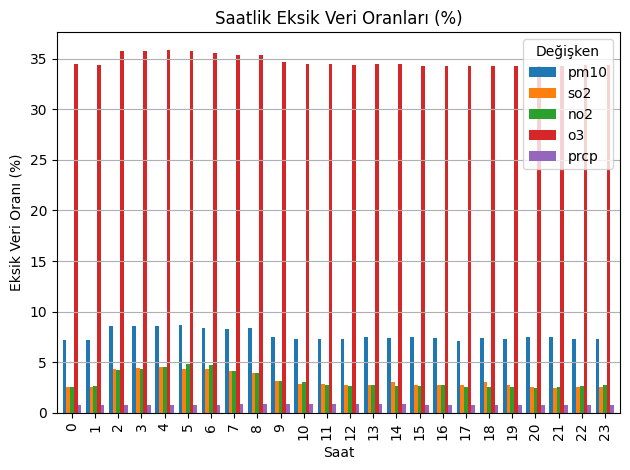

In [ ]:
# Saatlik eksik veri oranlarını yeniden hesaplayalım
saatlik_eksik = df.groupby("hour")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Bar plot çizimi
plt.figure(figsize=(12, 6))
saatlik_eksik.plot(kind='bar', width=0.8)
plt.title("Saatlik Eksik Veri Oranları (%)")
plt.xlabel("Saat")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

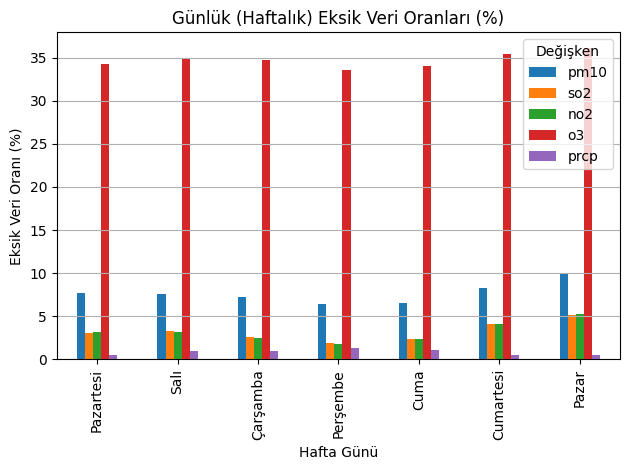

In [ ]:
# Gün bilgisi ekleyelim
df["weekday"] = df["datetime"].dt.dayofweek  # Pazartesi = 0, Pazar = 6
hafta_gunleri = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
df["hafta_gunu"] = df["weekday"].apply(lambda x: hafta_gunleri[x])

# Günlük (haftalık) eksik veri oranlarını hesaplayalım
gunluk_eksik = df.groupby("hafta_gunu")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Günleri haftalık sıraya göre sıralayalım
gunluk_eksik = gunluk_eksik.reindex(hafta_gunleri)

# Bar plot ile görselleştirelim
plt.figure(figsize=(12, 6))
gunluk_eksik.plot(kind='bar')
plt.title("Günlük (Haftalık) Eksik Veri Oranları (%)")
plt.xlabel("Hafta Günü")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

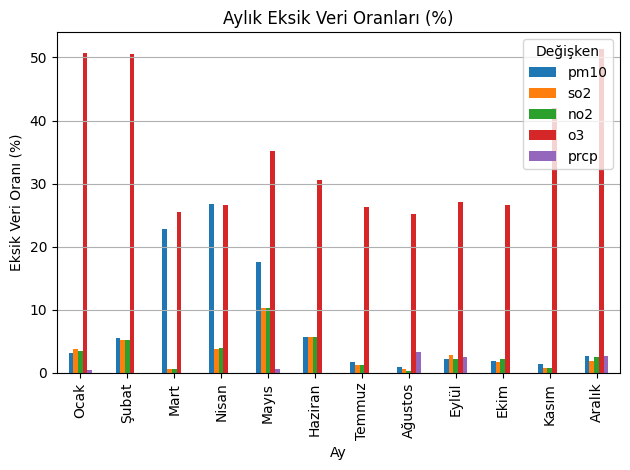

In [ ]:
# Aylık eksik veri oranlarını yeniden hesaplayalım
aylik_eksik = df.groupby("month")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Ay isimleri listesi
ay_isimleri = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
aylik_eksik.index = ay_isimleri

# Bar plot çizimi
plt.figure(figsize=(12, 6))
aylik_eksik.plot(kind='bar')
plt.title("Aylık Eksik Veri Oranları (%)")
plt.xlabel("Ay")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

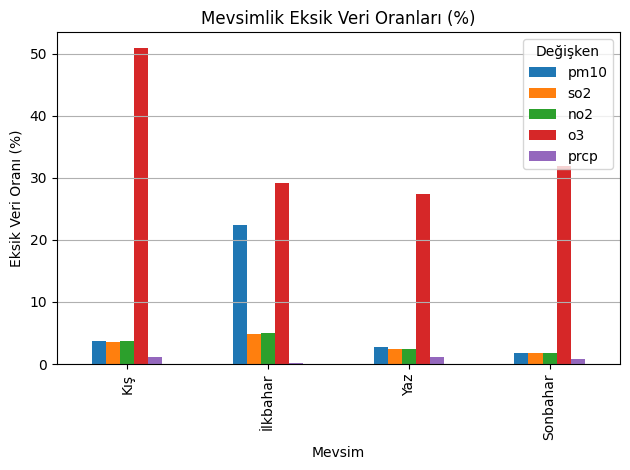

In [ ]:
# Mevsim tanımlama fonksiyonunu tekrar oluşturalım
def ay_to_mevsim(ay):
    if ay in [12, 1, 2]:
        return "Kış"
    elif ay in [3, 4, 5]:
        return "İlkbahar"
    elif ay in [6, 7, 8]:
        return "Yaz"
    else:
        return "Sonbahar"

# 'mevsim' sütununu yeniden oluştur
df["mevsim"] = df["datetime"].dt.month.apply(ay_to_mevsim)

# Mevsimlik eksik veri oranlarını hesapla
mevsim_eksik = df.groupby("mevsim")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Mevsimleri sıralayalım
mevsim_sirasi = ["Kış", "İlkbahar", "Yaz", "Sonbahar"]
mevsim_eksik = mevsim_eksik.reindex(mevsim_sirasi)

# Bar plot çizimi
plt.figure(figsize=(10, 6))
mevsim_eksik.plot(kind='bar')
plt.title("Mevsimlik Eksik Veri Oranları (%)")
plt.xlabel("Mevsim")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
# Gerekli kütüphaneler
!pip install xgboost  # Google Colab için
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBRegressor

# Kirletici ve meteorolojik değişkenler
kirleticiler = ['pm10', 'so2', 'no2', 'o3']
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
input_cols = kirleticiler + meteorolojik

# Veri çerçevesi (örnek olarak: df)
impute_df = df[input_cols].copy()

# XGBoost tabanlı imputasyon
imputer = IterativeImputer(
    estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    max_iter=10,
    random_state=42
)

# Eksik verileri tahmin et
imputed_array = imputer.fit_transform(impute_df)

# DataFrame'e aktar ve negatif değerleri düzelt
imputed_df = pd.DataFrame(imputed_array, columns=input_cols)
for col in kirleticiler:
    imputed_df[col] = imputed_df[col].apply(lambda x: max(x, 0))

# Orijinal veri setine aktar
for col in kirleticiler:
    df[col] = imputed_df[col]

In [ ]:
# 🔹 1. Gerekli kütüphaneler
!pip install xgboost
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 🔹 2. Meteorolojik sütunları belirle
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'pres']  # 'wdir' hariç
df_meteo = df[meteorolojik].copy()

# 🔹 3. Imputer'ı tanımla
imputer = IterativeImputer(
    estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    max_iter=10,
    random_state=42
)

# 🔹 4. Eksik verileri tahmin et
imputed_array = imputer.fit_transform(df_meteo)
df[meteorolojik] = pd.DataFrame(imputed_array, columns=meteorolojik)

# 🔹 5. Negatif değer kontrolü (örneğin sıcaklıklar için)
for col in meteorolojik:
    df[col] = df[col].apply(lambda x: max(x, 0))

In [ ]:
import numpy as np

# wdir eksik değerleri işlemek için sin-cos dönüşümü kullanalım

# Radyan dönüşümü
df['wdir_rad'] = np.deg2rad(df['wdir'])

# sin ve cos bileşenlerini oluştur
df['wdir_sin'] = np.sin(df['wdir_rad'])
df['wdir_cos'] = np.cos(df['wdir_rad'])

# Eksik sin ve cos değerlerini zaman tabanlı interpolasyonla tamamlayalım
df = df.set_index('datetime')
df['wdir_sin'] = df['wdir_sin'].interpolate(method='time')
df['wdir_cos'] = df['wdir_cos'].interpolate(method='time')

# sin ve cos bileşenlerinden orijinal dereceye geri dönüş
df['wdir'] = (np.arctan2(df['wdir_sin'], df['wdir_cos']) * 180 / np.pi) % 360

# Geçici sütunları kaldıralım
df = df.drop(columns=['wdir_rad', 'wdir_sin', 'wdir_cos'])

# Eksik veri kalmış mı kontrol edelim
df['wdir'].isnull().sum()

np.int64(0)

In [ ]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2021-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        35064 non-null  int64  
 1   month       35064 non-null  int64  
 2   day         35064 non-null  int64  
 3   hour        35064 non-null  int64  
 4   pm10        35064 non-null  float64
 5   so2         35064 non-null  float64
 6   no2         35064 non-null  float64
 7   o3          35064 non-null  float64
 8   temp        35064 non-null  float64
 9   dwpt        35064 non-null  float64
 10  rhum        35064 non-null  float64
 11  prcp        35064 non-null  float64
 12  wdir        35064 non-null  float64
 13  wspd        35064 non-null  float64
 14  pres        35064 non-null  float64
 15  weekday     35064 non-null  int32  
 16  hafta_gunu  35064 non-null  object 
 17  mevsim      35064 non-null  object 
dtypes: float64(11), int32(1), int64

In [ ]:
print(df_selected.describe().T)

        count         mean         std     min      25%      50%      75%      max
pm10  32366.0    43.264454   25.314861    0.31    26.27    37.62    53.81   320.89
so2   33940.0     8.258972    7.441090    0.00     3.83     6.23    10.46   209.86
no2   33945.0    31.745957   20.415370    0.38    16.96    27.27    41.70   178.03
o3    22884.0    54.206199   30.292367    1.28    31.28    53.39    75.26   192.34
temp  35064.0    15.521986    8.121103   -8.30     9.20    15.00    22.00    43.00
dwpt  35064.0    10.790038    6.541019   -9.50     6.20    11.00    16.00    27.00
rhum  35064.0    75.925650   16.789278   13.00    64.00    78.00    89.00   100.00
prcp  34778.0     0.073679    0.383725    0.00     0.00     0.00     0.00    11.70
wdir  35035.0   118.630427  115.663545    0.00    30.00    51.00   200.00   360.00
wspd  35064.0    16.274809   11.481866    0.00     5.40    14.80    24.10    74.20
pres  34902.0  1015.906143    6.416063  980.00  1011.60  1015.00  1020.00  1038.20


In [ ]:
from scipy.stats import zscore
import pandas as pd
from IPython.display import display # display fonksiyonunu içe aktar

# Sayısal değişkenler üzerinde Z-score hesaplayalım
numeric_cols = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
z_scores = df[numeric_cols].apply(zscore)

# Aykırı değerler: Z-score mutlak değeri > 3
z_outlier_counts = (z_scores.abs() > 3).sum()
total_counts = df[numeric_cols].count()
z_outlier_ratios = (z_outlier_counts / total_counts * 100).round(2)

# Özet tablo
z_outlier_summary = pd.DataFrame({
    'Aykırı Değer Sayısı (Z > 3)': z_outlier_counts,
    'Toplam Gözlem': total_counts,
    'Aykırı Oranı (%)': z_outlier_ratios
}).sort_values(by='Aykırı Oranı (%)', ascending=False)

# Z-Score Aykırı Değer Özetini Yazdır
print("Z-Score Aykırı Değer Özeti:")
display(z_outlier_summary)

Z-Score Aykırı Değer Özeti:


,Aykırı Değer Sayısı (Z > 3),Toplam Gözlem,Aykırı Oranı (%)
prcp,532,35064,1.52
so2,521,35064,1.49
pm10,522,35064,1.49
no2,451,35064,1.29
o3,172,35064,0.49
wspd,116,35064,0.33
pres,116,35064,0.33
rhum,62,35064,0.18
temp,5,35064,0.01
dwpt,0,35064,0.00


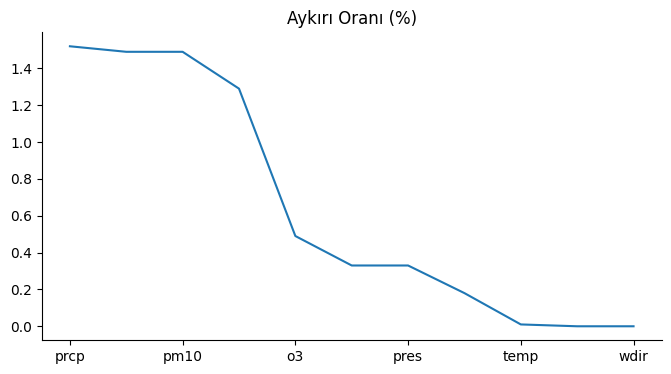

In [ ]:
from matplotlib import pyplot as plt
z_outlier_summary['Aykırı Oranı (%)'].plot(kind='line', figsize=(8, 4), title='Aykırı Oranı (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

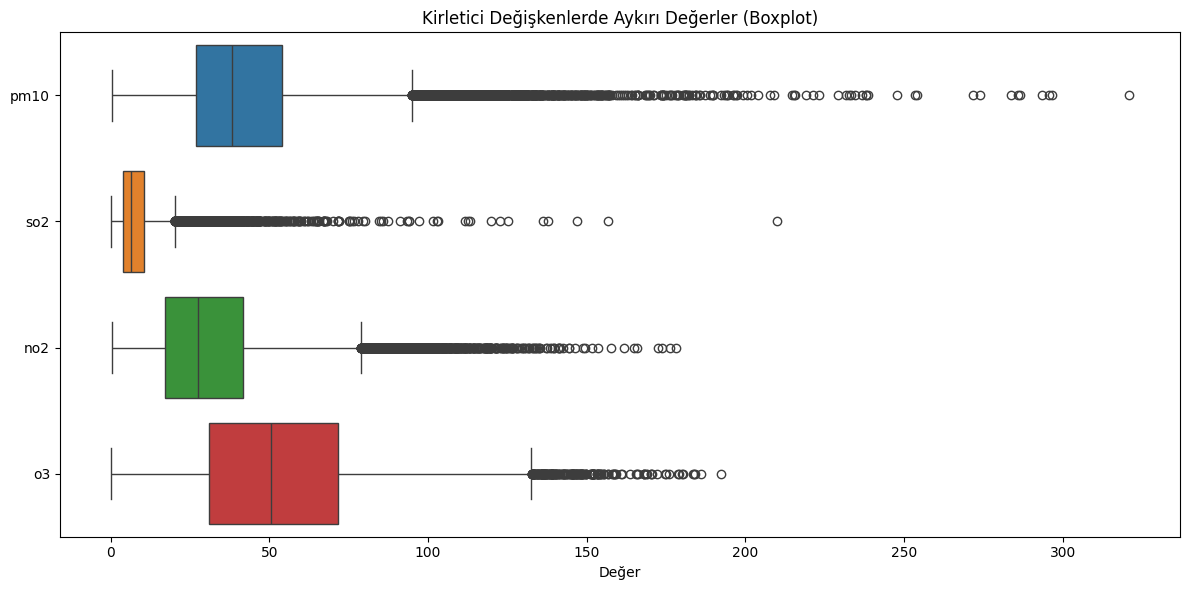

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kirletici değişkenler
kirleticiler = ['pm10', 'so2', 'no2', 'o3']

# Grafik ayarları
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[kirleticiler], orient='h')
plt.title("Kirletici Değişkenlerde Aykırı Değerler (Boxplot)")
plt.xlabel("Değer")
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['year', 'month', 'day', 'hour', 'pm10', 'so2', 'no2', 'o3', 'temp',
       'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'weekday', 'hafta_gunu',
       'mevsim'],
      dtype='object')

<Figure size 1400x800 with 0 Axes>

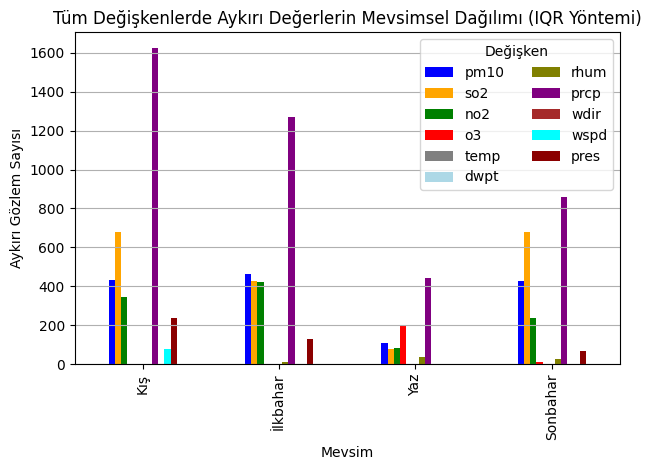

,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
mevsim,,,,,,,,,,,
Kış,430,681,346,0,0,0,0,1624,0,76,235
İlkbahar,464,426,424,1,0,0,10,1272,0,3,127
Yaz,109,79,85,197,3,0,35,440,0,2,0
Sonbahar,429,680,237,9,0,0,27,861,0,1,66


In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt

# datetime sütununu oluştur veya güncelle (index'ten sonra kullanmak için)
df["datetime"] = pd.to_datetime(df.index)


# Mevsim belirleme fonksiyonu
def ay_to_mevsim(ay):
    if ay in [12, 1, 2]:
        return "Kış"
    elif ay in [3, 4, 5]:
        return "İlkbahar"
    elif ay in [6, 7, 8]:
        return "Yaz"
    else:
        return "Sonbahar"

# Mevsim sütununu ekle
df["mevsim"] = df["datetime"].dt.month.apply(ay_to_mevsim)

# İncelenecek tüm sayısal değişkenler (kirleticiler + meteorolojik)
tum_deg = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']

# IQR yöntemiyle aykırı değer tespiti ve etiketleme
for col in tum_deg:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col + '_aykiri'] = ((df[col] < lower) | (df[col] > upper)).astype(int)

# Mevsime göre aykırı değerlerin toplamını hesapla
aykiri_mevsim = df.groupby('mevsim')[[col + '_aykiri' for col in tum_deg]].sum()

# Kolon adlarını sadeleştir
aykiri_mevsim.columns = tum_deg

# Mevsimleri sıralı hale getir
mevsim_sirasi = ["Kış", "İlkbahar", "Yaz", "Sonbahar"]
aykiri_mevsim = aykiri_mevsim.reindex(mevsim_sirasi)

# Görselleştirme
plt.figure(figsize=(14, 8))
renkler = ['blue', 'orange', 'green', 'red', 'gray', 'lightblue', 'olive', 'purple', 'brown', 'cyan', 'darkred']
aykiri_mevsim.plot(kind='bar', color=renkler)
plt.title("Tüm Değişkenlerde Aykırı Değerlerin Mevsimsel Dağılımı (IQR Yöntemi)")
plt.xlabel("Mevsim")
plt.ylabel("Aykırı Gözlem Sayısı")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

# Çıktıyı da tablo halinde verelim
aykiri_mevsim